In [608]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics, tree
import seaborn as sns
from sklearn.model_selection import train_test_split
from pprint import pprint
import xgboost as xgb
from xgboost import plot_tree
from collections import defaultdict
import matplotlib.ticker as ticker

# Load data

In [609]:
data = pd.read_excel("IV-DATA - Translated.xlsx", sheet_name="Data")
df = pd.DataFrame(data)
df.head()

,Applicant,Question,achiever,action-oriented,active,adaptable,agile,ambitious,attentive,calm,...,sturdiness,sure,systematic,task-oriented,thorough,tolerant,triumphant,trustworthy,useful,wise
0,6e5cadf41a5f8a591f666e98c66ce691,1,0.080678,0.654556,0.215110,0.146238,0.085734,0.069208,0.069946,0.037715,...,0.168521,0.058586,0.070397,0.529923,0.238673,0.070469,0.096956,0.073384,0.232293,0.081801
1,6e5cadf41a5f8a591f666e98c66ce691,2,0.627317,0.929249,0.457680,0.293279,0.407006,0.399087,0.561051,0.191383,...,0.463673,0.429596,0.586520,0.830673,0.430382,0.301516,0.401278,0.304090,0.611836,0.437801
2,6e5cadf41a5f8a591f666e98c66ce691,3,0.474610,0.678710,0.494967,0.941991,0.211321,0.539131,0.813721,0.097992,...,0.588201,0.876560,0.628414,0.512157,0.860079,0.119097,0.536795,0.130486,0.738337,0.528956
3,6e5cadf41a5f8a591f666e98c66ce691,5,0.465788,0.901418,0.604448,0.417883,0.242591,0.559507,0.650982,0.106956,...,0.445847,0.497816,0.671046,0.527789,0.719118,0.315106,0.338971,0.338992,0.692920,0.423566
4,6e5cadf41a5f8a591f666e98c66ce691,6,0.621838,0.860378,0.910976,0.950429,0.716624,0.336634,0.822668,0.845097,...,0.602153,0.781754,0.517610,0.335495,0.867900,0.939655,0.656990,0.868053,0.931655,0.858658


# EDA + Data preparation and feature pruning

Number of unique applicants:  84
Number of times each question was asked:  Question
3    83
5    83
6    83
4    83
2    82
1    79
Name: count, dtype: int64


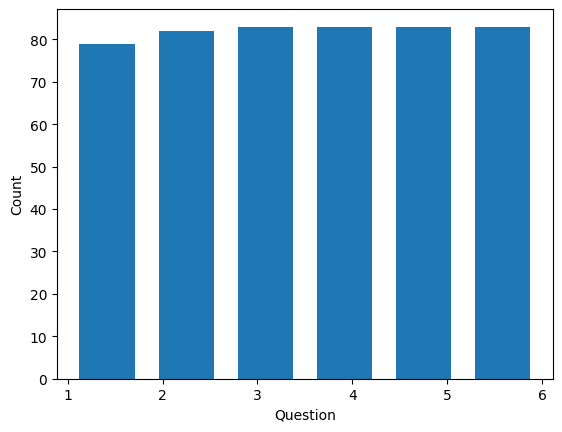


Mean characteristics variance:  0.046025157584142766
Mean standard deviation:  0.21164784658183175
10 most variant characteristics:                          0         1
grateful         0.089778  0.299630
optimistic       0.083607  0.289149
task-oriented    0.081712  0.285853
problem-solving  0.081340  0.285202
confident        0.080960  0.284535
friendly         0.076946  0.277391
pleased          0.076763  0.277062
satisfied        0.069687  0.263982
triumphant       0.067350  0.259518
calm             0.067008  0.258859

10 least variant characteristics:                        0         1
resourceful    0.027632  0.166230
determined     0.027016  0.164366
contributor    0.026983  0.164265
experienced    0.023868  0.154493
useful         0.023193  0.152293
interested     0.023185  0.152266
communicative  0.022958  0.151520
helpful        0.021227  0.145694
doing          0.016863  0.129856


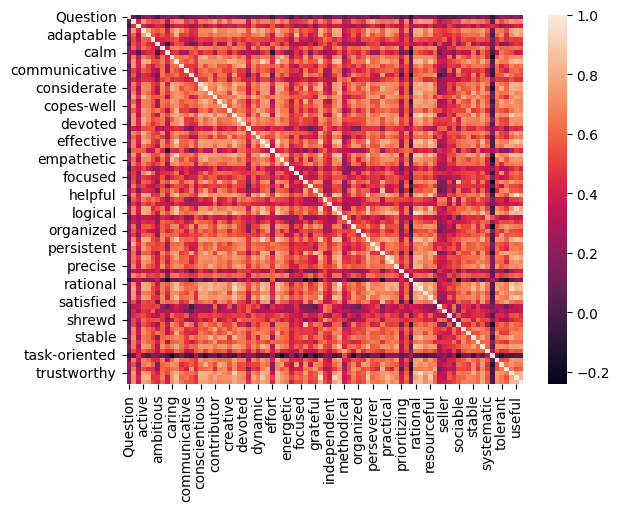

,Question,achiever,action-oriented,active,adaptable,agile,ambitious,attentive,calm,caring,...,sturdiness,sure,systematic,task-oriented,thorough,tolerant,triumphant,trustworthy,useful,wise
count,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,...,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000,493.000000
mean,3.523327,0.597693,0.768195,0.690215,0.718738,0.344148,0.541236,0.702283,0.244928,0.707478,...,0.551448,0.617292,0.558705,0.571175,0.718367,0.560903,0.422698,0.645019,0.845168,0.669630
std,1.701853,0.202515,0.180966,0.175837,0.211821,0.211766,0.208754,0.194434,0.258859,0.232936,...,0.193148,0.225278,0.228016,0.285853,0.209733,0.247147,0.259518,0.223793,0.152293,0.201200
min,1.000000,0.029985,0.018974,0.057981,0.054580,0.018858,0.008418,0.069946,0.000709,0.096777,...,0.022480,0.045721,0.012734,0.012820,0.049922,0.006381,0.004768,0.034297,0.150811,0.075197
25%,2.000000,0.448722,0.695712,0.604448,0.594562,0.189867,0.391108,0.574240,0.048107,0.542817,...,0.412714,0.464030,0.385895,0.361355,0.611040,0.352850,0.189448,0.499809,0.807590,0.528956
50%,4.000000,0.630104,0.816615,0.715309,0.770056,0.299103,0.548630,0.758040,0.154882,0.776091,...,0.562882,0.616820,0.544554,0.614103,0.774594,0.562097,0.424878,0.675764,0.894691,0.712080
75%,5.000000,0.731654,0.899095,0.818129,0.886238,0.444777,0.692636,0.859355,0.357870,0.902093,...,0.698692,0.808246,0.727525,0.830673,0.873978,0.781436,0.633243,0.825801,0.946696,0.828709
max,6.000000,0.938123,0.982760,0.965920,0.992447,0.954938,0.977340,0.979755,0.981072,0.978058,...,0.921575,0.992033,0.987181,0.979901,0.963543,0.978860,0.949172,0.988050,0.989443,0.973603


In [610]:
# How many unique applications are there?
print("Number of unique applicants: ", len(df["Applicant"].unique()))

# How many times each question was asked?
print("Number of times each question was asked: ", df["Question"].value_counts())
plt.hist(df["Question"], bins=6, rwidth=0.7)
plt.xlabel('Question')
plt.ylabel('Count')
plt.show()

# 10 most variant characteristics
var_df = df.drop(["Applicant", "Question"], axis=1, inplace=False).var().sort_values(ascending=False)
std_df = df.drop(["Applicant", "Question"], axis=1, inplace=False).std().sort_values(ascending=False)
print("\nMean characteristics variance: ", var_df.mean())
print("Mean standard deviation: ", std_df.mean())
print("10 most variant characteristics: ", pd.concat([var_df[:10], std_df[:10]], axis=1))
print("\n10 least variant characteristics: ", pd.concat([var_df[-9:], std_df[-9:]], axis=1))

# Correlation matrix
corr_matrix = df.drop(['Applicant'], axis=1, inplace=False).corr()
sns.heatmap(corr_matrix)
plt.show()

# Describe the data
df.describe()


In [611]:
# Anonymize the data
applicants = df["Applicant"]
df.drop(['Applicant'], axis=1, inplace=True)

In [612]:
# Manual complex features selection
def split_simple_complex_traits(df):
    complex_traits = [
        "seller",
        "committed",
        "consistent",
        "considerate",
        "service-oriented",
        "action-oriented",
        "conscientious",
        "triumphant",
        "tolerant",
        "proactivity",
        "persistent",
        "independent",
        "pleased",
        "organized",
        "go-getter"
    ]
    target_traits_df = df[complex_traits]
    simple_df = df.drop(complex_traits, axis=1, inplace=False)
    return simple_df, target_traits_df

In [613]:
# Variance Thresholding
# https://towardsdatascience.com/how-to-use-variance-thresholding-for-robust-feature-selection-a4503f2b5c3f

from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler

def prune_invariant_features(df, variance_threshold=0.03):
    # variance_threshold=0.03 is standard deviation of 0.17
    vt = VarianceThreshold(variance_threshold)
    _ = vt.fit(df)
    mask = vt.get_support()
    df = df.loc[:, mask]
    return df

In [614]:
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance_multicollinear.html
# Cluster groups of correlated features using the hierarchical clustering algorithm

from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
from scipy.stats import spearmanr

def get_spearmanr_correlation_matrix(df):
    corr = spearmanr(df).correlation
    corr = (corr + corr.T) / 2
    np.fill_diagonal(corr, 1)
    return corr

def get_distance_linkage(corr):
    distance_matrix = 1 - np.abs(corr)
    dist_linkage = hierarchy.ward(squareform(distance_matrix))
    return dist_linkage

def plot_correlated_features_clusters(dist_linkage, corr, columns):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
    dendro = hierarchy.dendrogram(
        dist_linkage, labels=columns, ax=ax1, leaf_rotation=90
    )
    dendro_idx = np.arange(0, len(dendro["ivl"]))
    ax2.imshow(corr[dendro["leaves"], :][:, dendro["leaves"]])
    ax2.set_xticks(dendro_idx)
    ax2.set_yticks(dendro_idx)
    ax2.set_xticklabels(dendro["ivl"], rotation="vertical")
    ax2.set_yticklabels(dendro["ivl"])
    fig.tight_layout()
    plt.show()

def get_correlated_features_clusters(dist_linkage, df, threshold=0.25):
    cluster_ids = hierarchy.fcluster(dist_linkage, threshold, criterion="distance")
    cluster_id_to_feature_ids = defaultdict(list)
    for idx, cluster_id in enumerate(cluster_ids):
        cluster_id_to_feature_ids[cluster_id].append(df.columns[idx])
    selected_features = [v[0] for v in cluster_id_to_feature_ids.values()]
    return selected_features

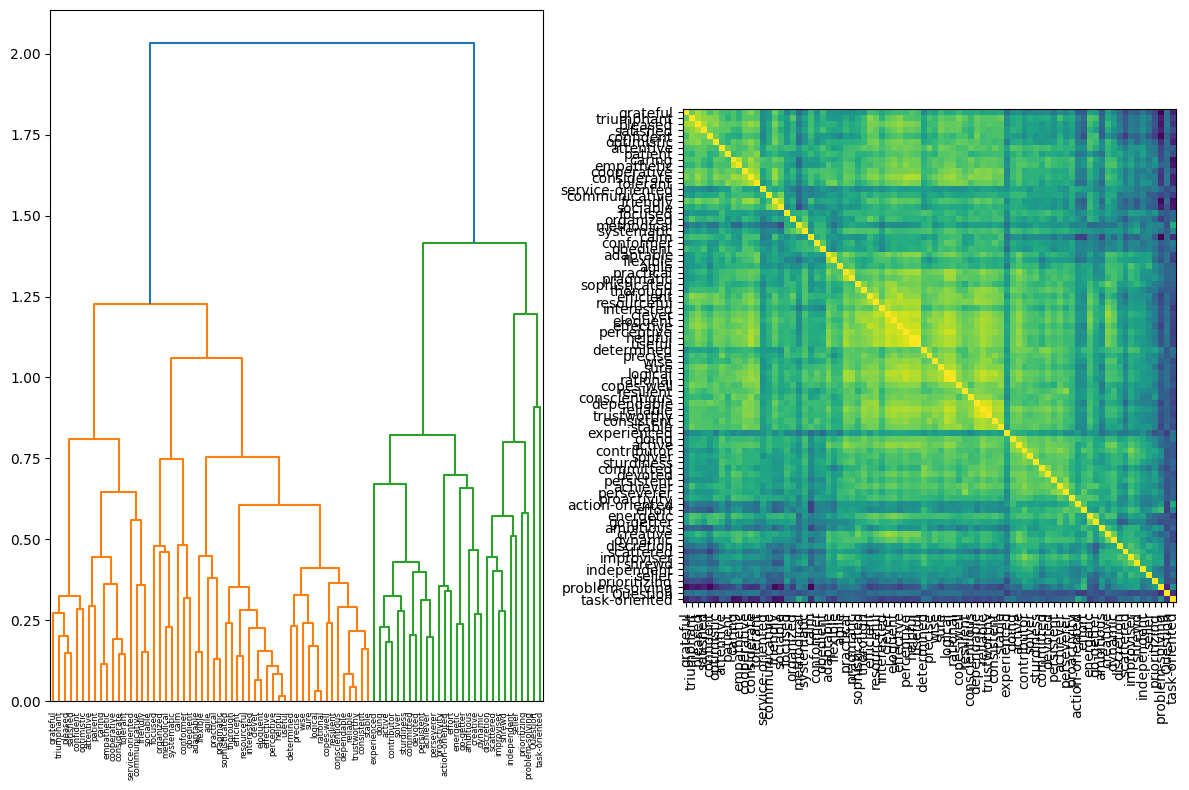

In [615]:
spearmanr_corr = get_spearmanr_correlation_matrix(df)
dist_linkage = get_distance_linkage(spearmanr_corr)
plot_correlated_features_clusters(dist_linkage, spearmanr_corr, df.columns)

1. Split dataset into simple and complex traits

2. Create 4 feature sets such that each of them goes through a different pruning process
   1. 1/0xx - Prune/Don't prune invariant features
   
   2. x1/0x - Prune/Don't prune highly correlated features
   
   3. xx1/0 - Unify/Don't unify same applicants in train/tests sets

In [616]:
# Remove question column and keep it
questions = df["Question"]
pruned_df = df.drop(["Question"], axis=1, inplace=False)

# Split into simple and complex traits
pruned_df, target_traits_df = split_simple_complex_traits(pruned_df)

pruned_df_00 = pruned_df.copy()

# Remove invariant features
pruned_df = prune_invariant_features(pruned_df)
pruned_df_01 = pruned_df.copy()

# Add question column back
pruned_df_00.loc[:, "Question"] = questions.copy()
pruned_df_01.loc[:, "Question"] = questions.copy()

# Cluster highly correlated features
spearmanr_corr = get_spearmanr_correlation_matrix(pruned_df_00)
dist_linkage = get_distance_linkage(spearmanr_corr)
feature_leaders = get_correlated_features_clusters(dist_linkage, pruned_df_00, threshold=0.25)
pruned_df_10 = pruned_df_00.loc[:, feature_leaders]

spearmanr_corr = get_spearmanr_correlation_matrix(pruned_df_01)
dist_linkage = get_distance_linkage(spearmanr_corr)
feature_leaders = get_correlated_features_clusters(dist_linkage, pruned_df_01, threshold=0.25)
pruned_df_11 = pruned_df_01.loc[:, feature_leaders]


In [617]:
X = [pruned_df_00, pruned_df_01, pruned_df_10, pruned_df_11]
y = target_traits_df

In [618]:
# Split into train and test sets - regular

X_train_00, X_test_00, X_train_01, X_test_01, X_train_10, X_test_10, X_train_11, X_test_11, y_train, y_test = \
    train_test_split(*X, y, test_size=0.2, random_state=42)
X_pairs = [
    (X_train_00, X_test_00, y_train, y_test),
    (X_train_01, X_test_01, y_train, y_test),
    (X_train_10, X_test_10, y_train, y_test),
    (X_train_11, X_test_11, y_train, y_test)
]

In [619]:
# Split to train/test by applicant
def split_by_applicant(X_, applicants_train, applicants_test):
    X = X_.copy()
    X.loc[: , "Applicant"] = applicants.copy()
    X_train = X[X["Applicant"].isin(applicants_train)].copy()
    X_test = X[X["Applicant"].isin(applicants_test)].copy()
    return X_train.drop(["Applicant"], axis=1, inplace=False), X_test.drop(["Applicant"], axis=1, inplace=False)

applicants_train, applicants_test = train_test_split(applicants.unique(), test_size=0.2, random_state=42)
y_train, y_test = split_by_applicant(y, applicants_train, applicants_test)
X_pairs.extend([(*split_by_applicant(x, applicants_train, applicants_test), y_train, y_test) for x in X])

## Polynomial Regressor

In [620]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


def linear_to_poly(X_train, degree):
    """
    input: X_train, X_test - numpy arrays, degree - int
    output: X_train_poly, X_test_poly - numpy arrays, poly_names - list
    description: This function takes in the training and testing data and the degree of the polynomial to be used and returns the polynomial features of the data
                The polynomial features are the original features raised to the powers from 0 to the degree
                The function also returns the names of the polynomial features
                """

    poly_features = PolynomialFeatures(degree=degree)
    X_train_poly = poly_features.fit_transform(X_train)
    poly_names = poly_features.get_feature_names_out()
    return X_train_poly, poly_names

def train_poly_model(X_train, y_train):
    X_train_poly, _ = linear_to_poly(X_train, 1)
    model = LinearRegression()
    model.fit(X_train_poly, y_train)
    return model

## Model evaluation functionality

In [621]:
# Model evaluation

from abc import ABCMeta
from typing import Any


def get_rmse(y_test, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

def get_discrete_accuracy(y_test, y_pred, max_distance=0.1):
    pred_comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
    pred_comparison_df["True/False"] = np.abs(pred_comparison_df["Actual"] - pred_comparison_df["Predicted"]) < max_distance
    return pred_comparison_df["True/False"].value_counts()[True] / len(pred_comparison_df)

def plot_feature_importance(ax1, feature_scores: dict, xlabel: str, ylabel: str):
    # Plot the feature importance on the left subplot (ax1)
    ax1.barh(range(len(feature_scores)), list(feature_scores.values()), align='center')
    ax1.set_yticks(range(len(feature_scores)))
    ax1.set_yticklabels(list(feature_scores.keys()))
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_title('Relative importance of Top 10 Features')

class ModelEvaluation:
    rmse: float
    discrete_accuracy: float
    top_n_features: dict
        
    def __init__(self, model, y_test: pd.Series, y_pred: pd.DataFrame, target: str) -> None:
        self.model = model
        self.rmse = get_rmse(y_test, y_pred)
        self.discrete_accuracy = get_discrete_accuracy(y_test, y_pred)
        self.top_n_features = self.get_top_n_features(10)
        self.target = target
    
    def show(self, pruning_option: str):
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        plot_feature_importance(ax1, self.top_n_features, self.xlabel, self.ylabel)
        ax2.axis('off')  # Disable the axis for the right subplot
        display_accuracy = f"{round(self.discrete_accuracy * 100, 2)}%"
        ax2.text(0.5, 0.5, f"RMSE: {self.rmse}\n\nDiscrete accuracy: {display_accuracy}", fontsize=20, ha='center', va='center')
        plt.suptitle(f"{self.model_type} - Prediction for '{self.target}'\nPruning : {pruning_option}", fontsize=24, y=1.05)
        plt.tight_layout()  # Adjust the layout to avoid overlapping
        plt.show()

class XGBEvaluation(ModelEvaluation):
    xlabel = 'Total Gain'
    ylabel = 'Features'
    model_type = 'XGBoost'

    def get_top_n_features(self, n: int):
        score = self.model.get_booster().get_score(importance_type='total_gain')
        topn_features = []
        for key in sorted(score, key=lambda x: score[x], reverse=True):
            topn_features.append(key)
        topn_scores = {key: value for key, value in score.items() if key in topn_features[:n]}
        return topn_scores

class PolyEvaluation(ModelEvaluation):
    xlabel = 'Coefficient'
    ylabel = 'Features'
    model_type = 'Polynomial Regression'

    def __init__(self, *args, feature_names: list = None):
        self.feature_names = feature_names
        super().__init__(*args)

    def get_top_n_features(self, n: int):
        feature_coefficient_dict = dict(zip(self.feature_names, self.model.coef_))
        return dict(sorted(feature_coefficient_dict.items(), key=lambda x: abs(x[1]), reverse=True)[:n])

## XGBoost Regressor

In [622]:
def train_xgboost_model(X_train, y_train):
    model = xgb.XGBRegressor(tree_method="exact", min_child_weight=10, max_depth=4)
    model.fit(X_train, y_train)
    return model

## Train models and evaluate the,

In [623]:
# For each target label, we train both Polynomial Regression and XGBoost models
# on each of the 8 data preparation techniques (000, 001, 010, 011, 100, 101, 110, 111)
# For each target label and type of model, we keep track of the preparation technique that
# yields the best model (lowest RMSE)

# Be patient, it takes ~2 mins
target_to_optimal_model = {
    "poly": dict(),
    "xgboost": dict()
}
data_preparation_techniques = ["000", "001", "010", "011", "100", "101", "110", "111"]
for target in target_traits_df.columns:
    for model_alg in ["poly", "xgboost"]:
        opt_model = None
        opt_eval: ModelEvaluation = None
        opt_feature_pruning = None
        opt_rmse = 100
        for (X_train, X_test, y_train, y_test), idx in zip(X_pairs, data_preparation_techniques): 
            if model_alg == "xgboost":
                model = train_xgboost_model(X_train, y_train[target])
                pred = model.predict(X_test)
                eval = XGBEvaluation(model, y_test[target], pred, target)
            else:
                model = train_poly_model(X_train, y_train[target])
                poly_X_test, X_test_names = linear_to_poly(X_test, 1)
                pred = model.predict(poly_X_test)
                eval = PolyEvaluation(model, y_test[target], pred, target, feature_names=X_test_names)
            if eval.rmse < opt_rmse:
                opt_rmse = eval.rmse
                opt_model = model
                opt_eval = eval
                opt_feature_pruning = idx
                opt_X_train = X_train
                opt_X_test = X_test
                opt_y_train = y_train
                opt_y_test = y_test
        target_to_optimal_model[model_alg][target] = (opt_model, opt_eval, opt_feature_pruning, opt_X_train, opt_X_test, opt_y_train, opt_y_test)

In [637]:
poly_models = target_to_optimal_model['poly']
xgb_models = target_to_optimal_model['xgboost']

### Optimal full models by pruning technique

<Axes: title={'center': 'XGBoost - Frequency of optimality by feature pruning technique'}, xlabel='Feature pruning technique', ylabel='Frequency'>

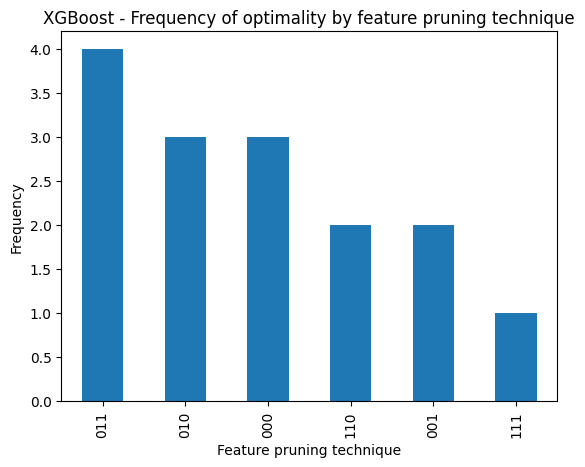

In [638]:
pd.DataFrame.from_dict(xgb_models, orient="index").loc[:, 2].value_counts().plot(kind='bar', title="XGBoost - Frequency of optimality by feature pruning technique", xlabel="Feature pruning technique", ylabel="Frequency")


<Axes: title={'center': 'Polynomial Regression - Frequency of optimality by feature pruning technique'}, xlabel='Feature pruning technique', ylabel='Frequency'>

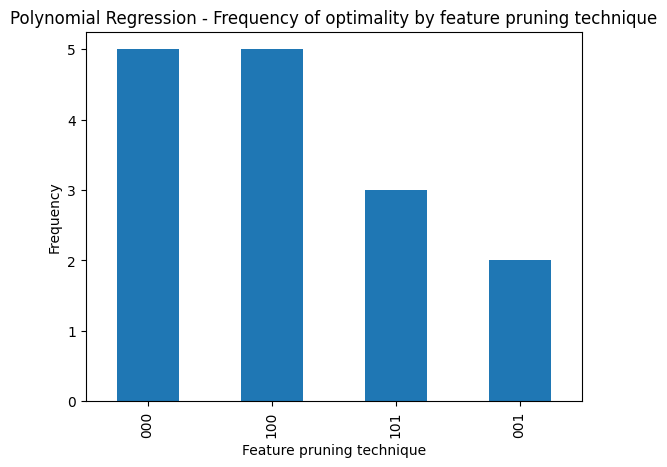

In [639]:
pd.DataFrame.from_dict(poly_models, orient="index").loc[:, 2].value_counts().plot(kind='bar', title="Polynomial Regression - Frequency of optimality by feature pruning technique", xlabel="Feature pruning technique", ylabel="Frequency")


## Compact models

We choose the 5 most important features of each model and re-train the model only with them

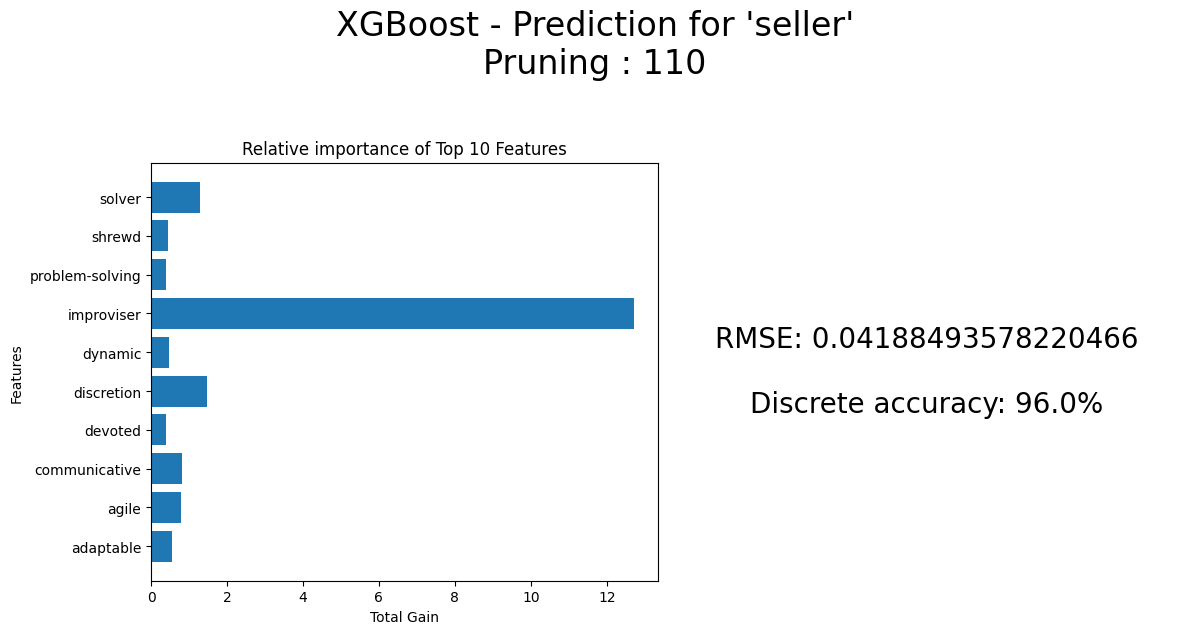

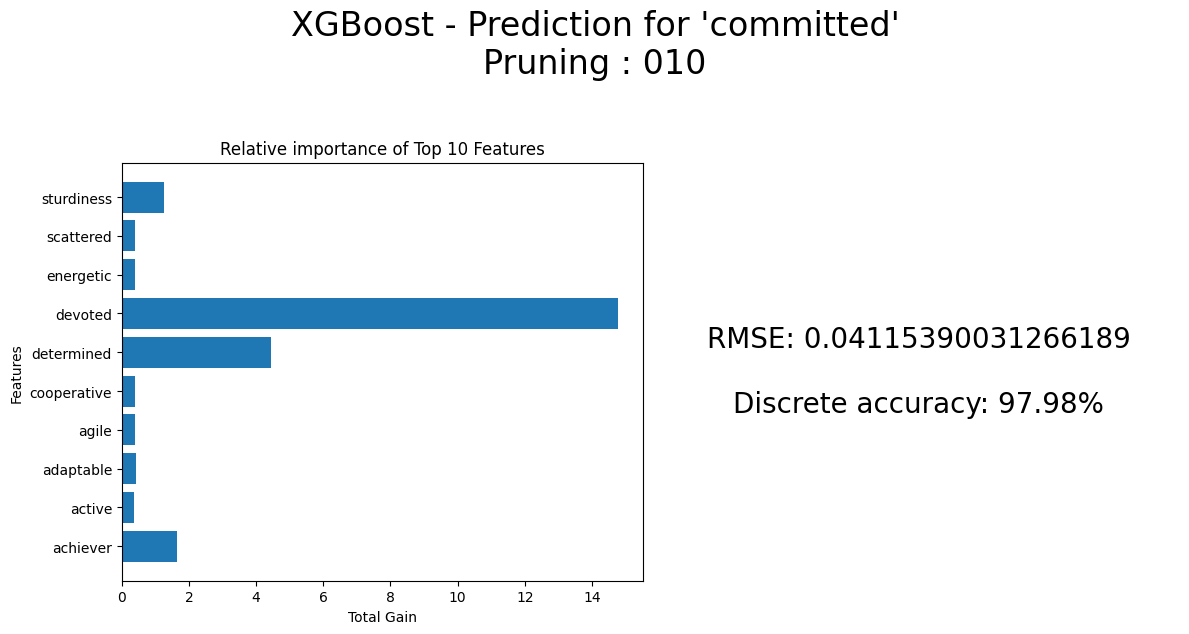

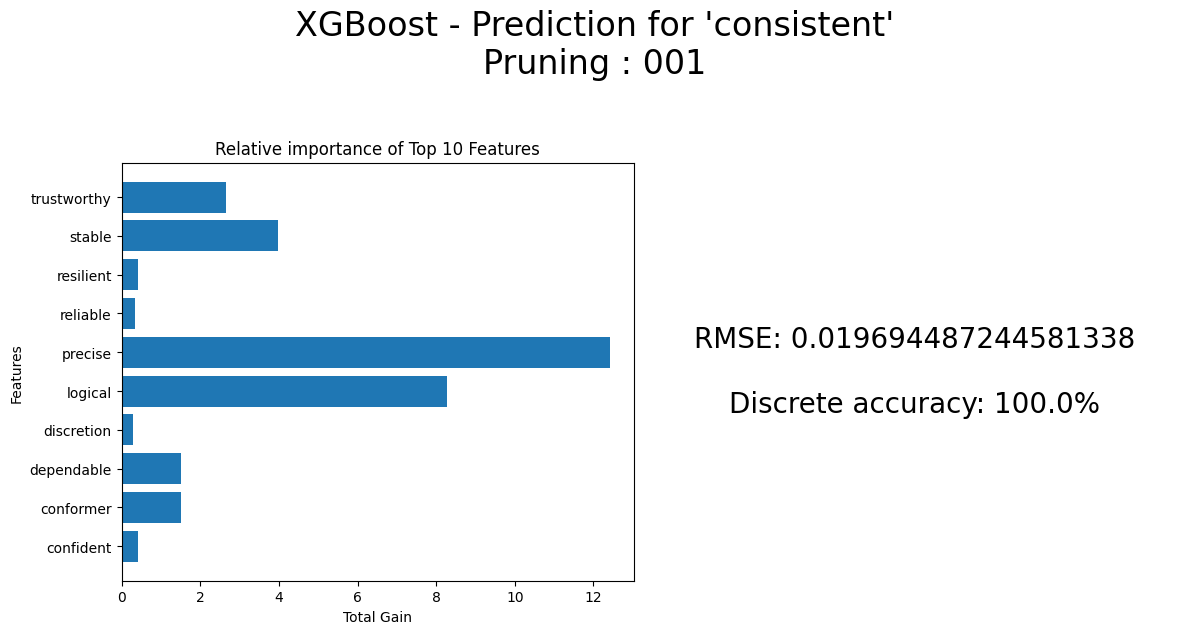

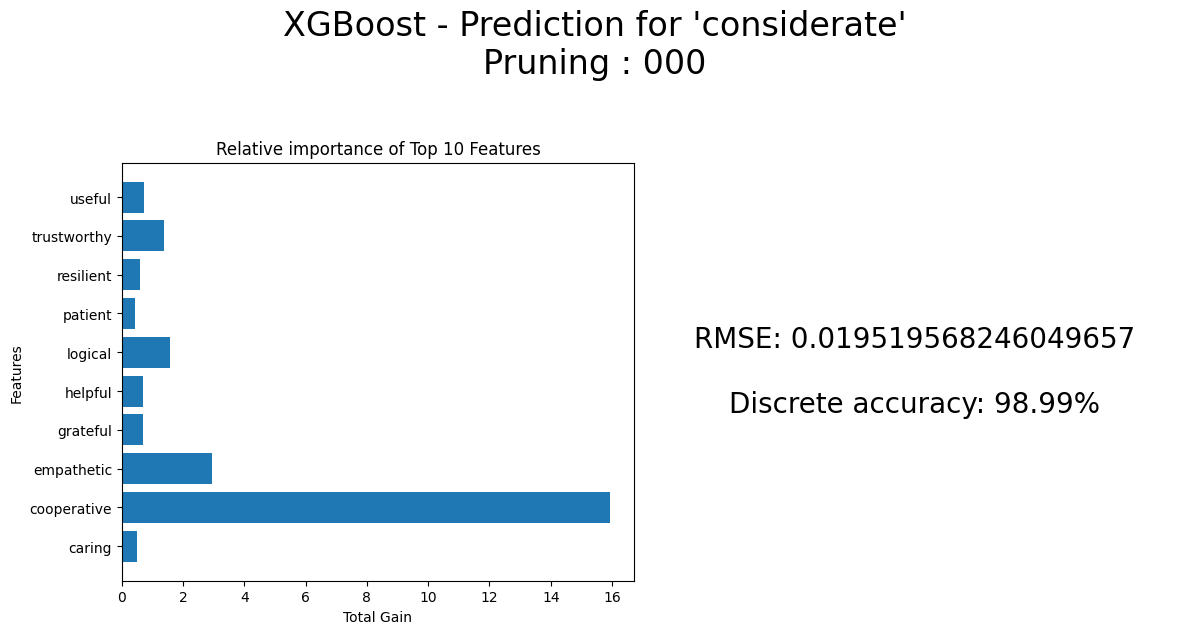

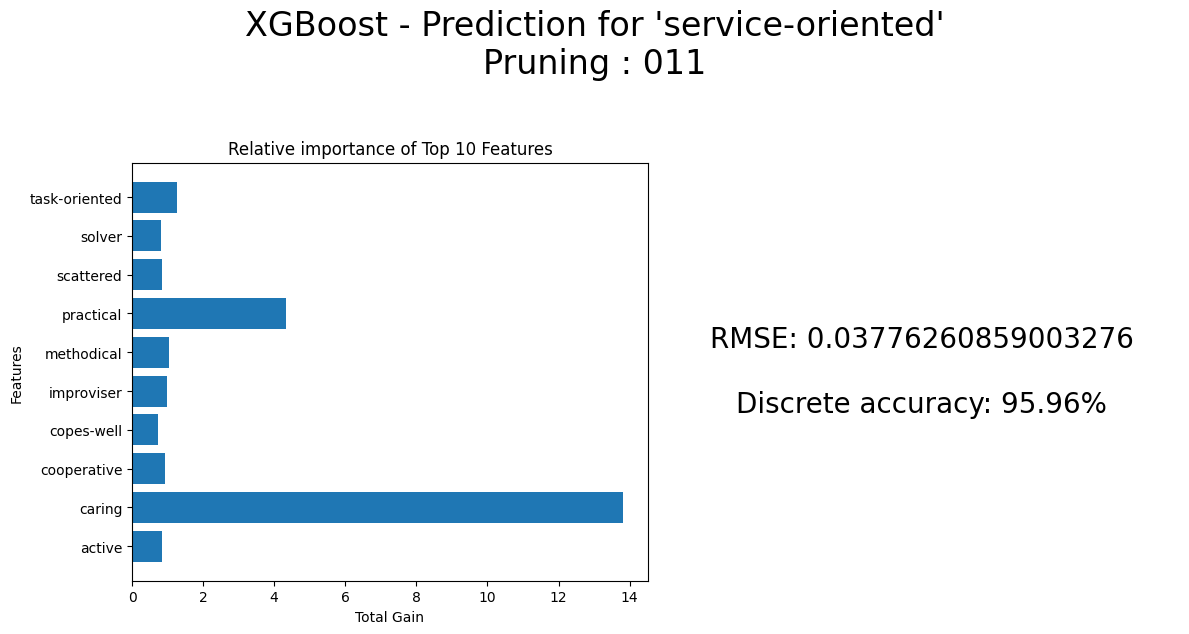

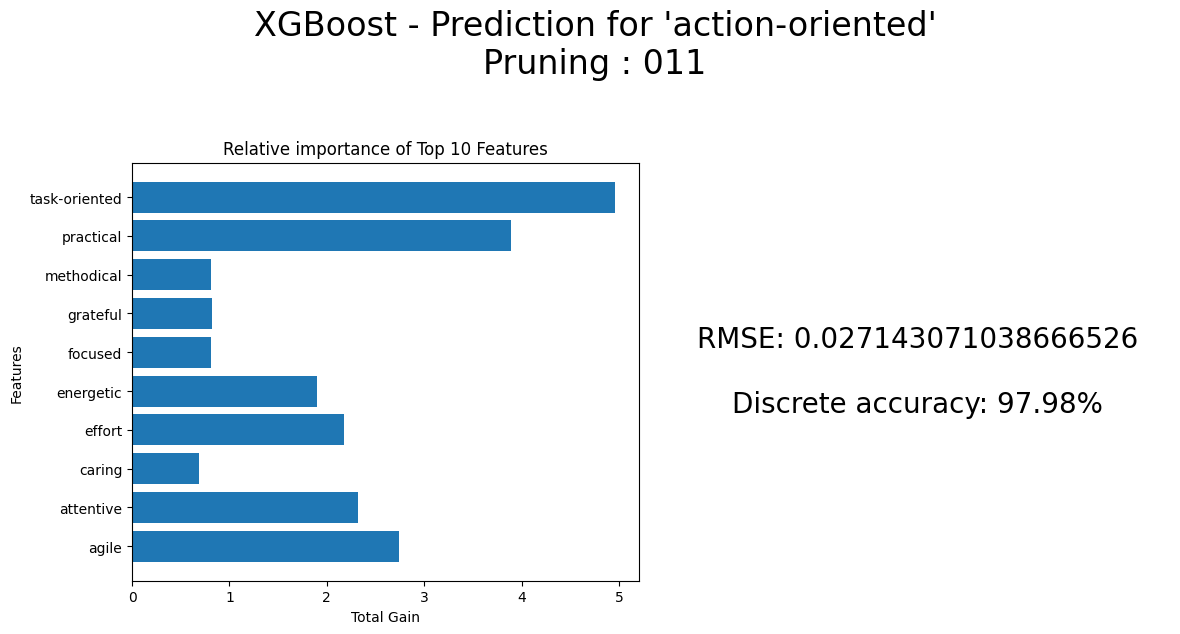

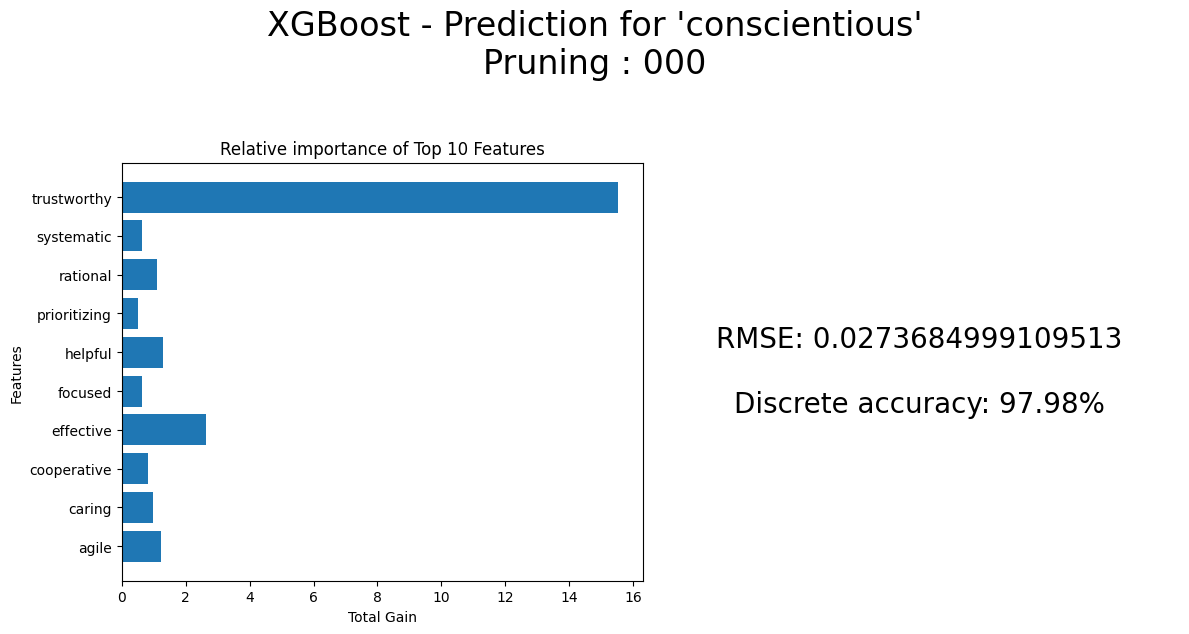

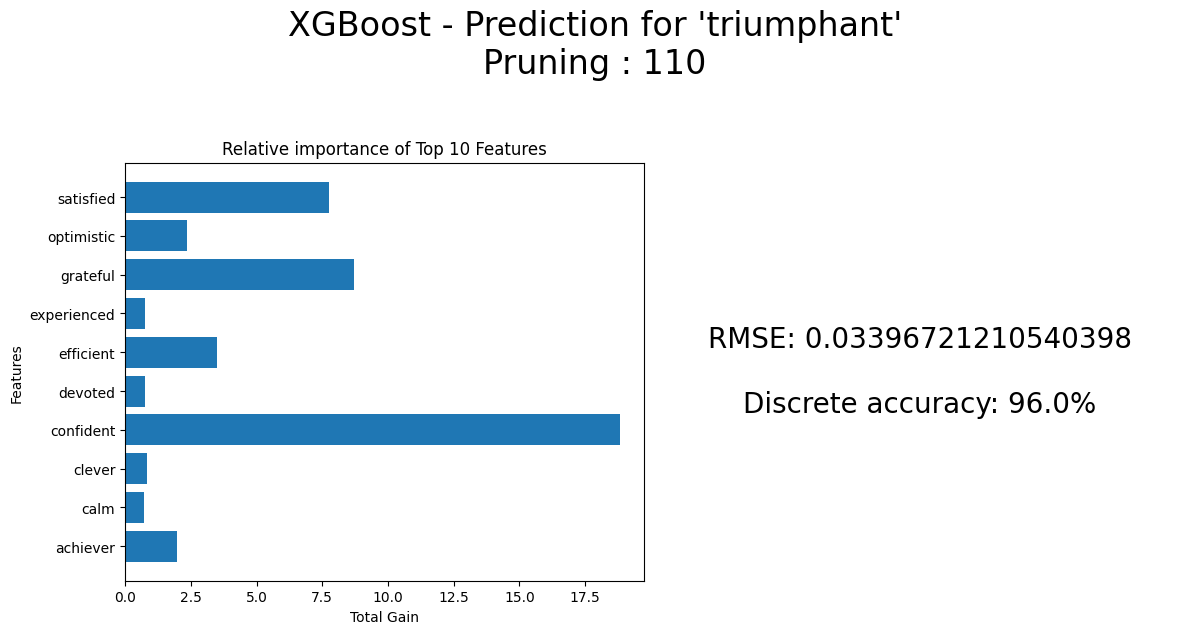

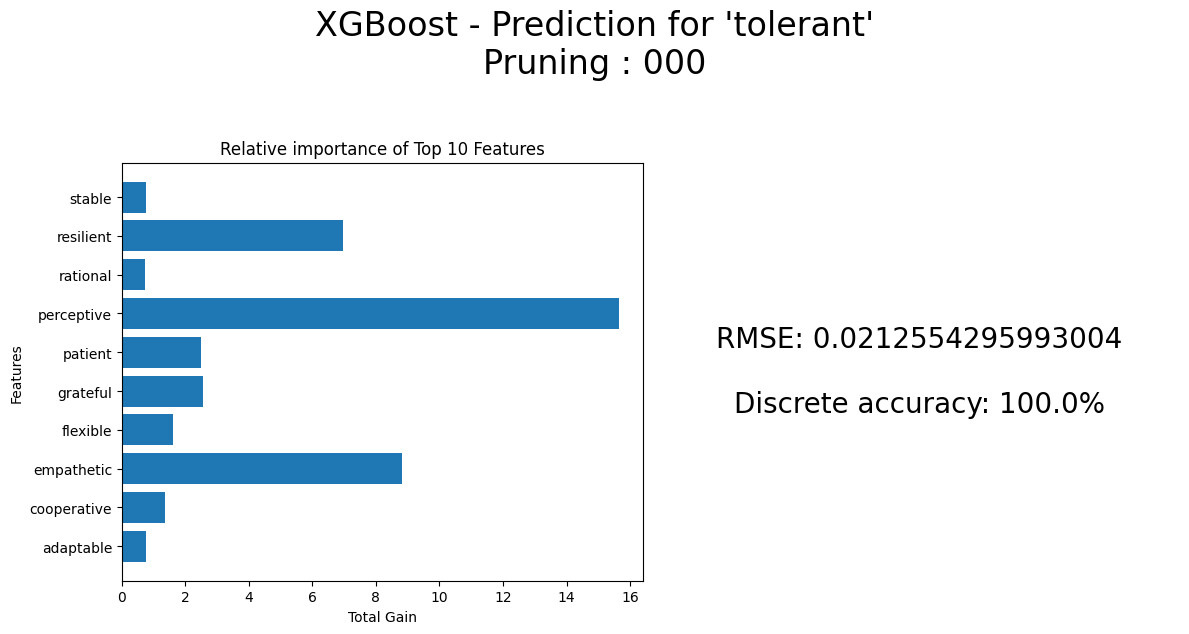

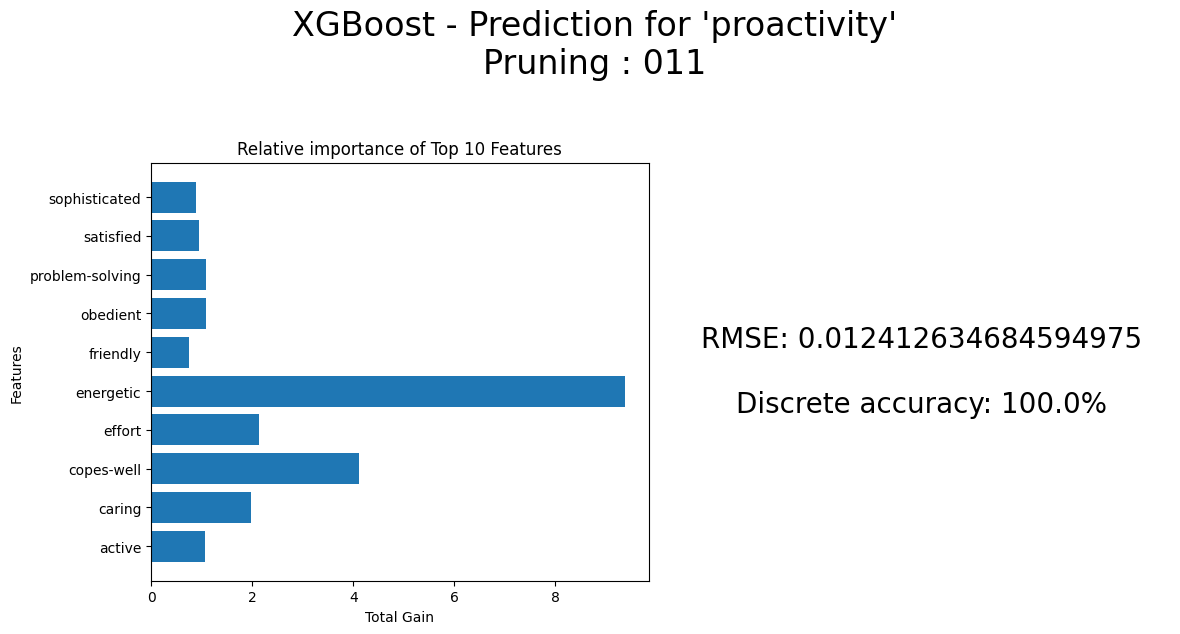

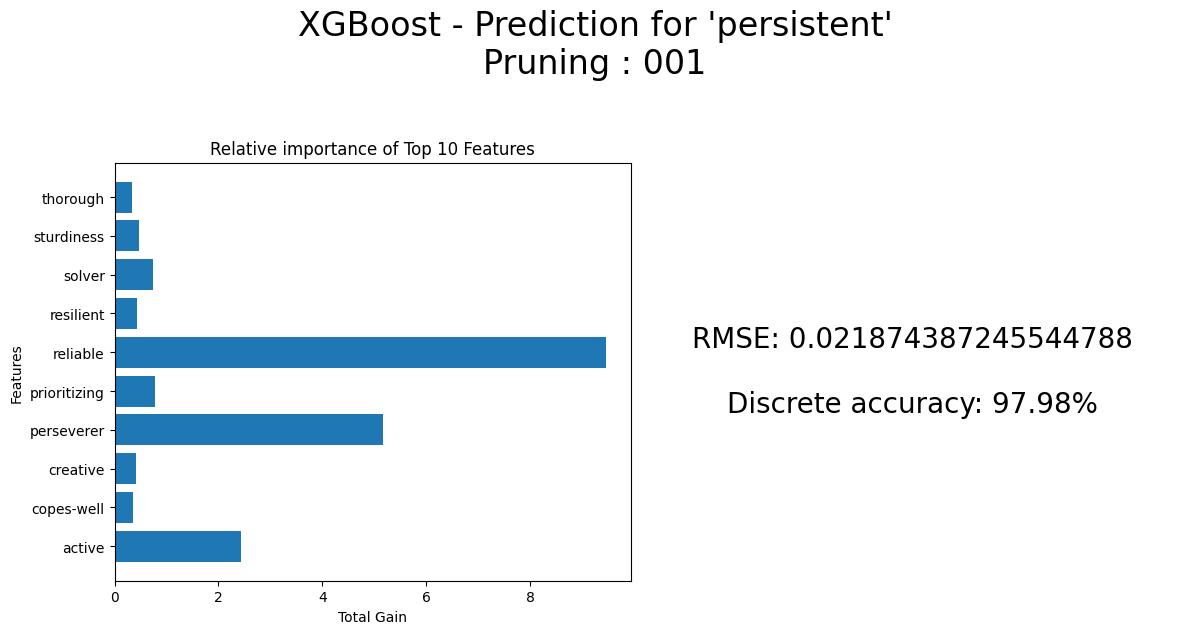

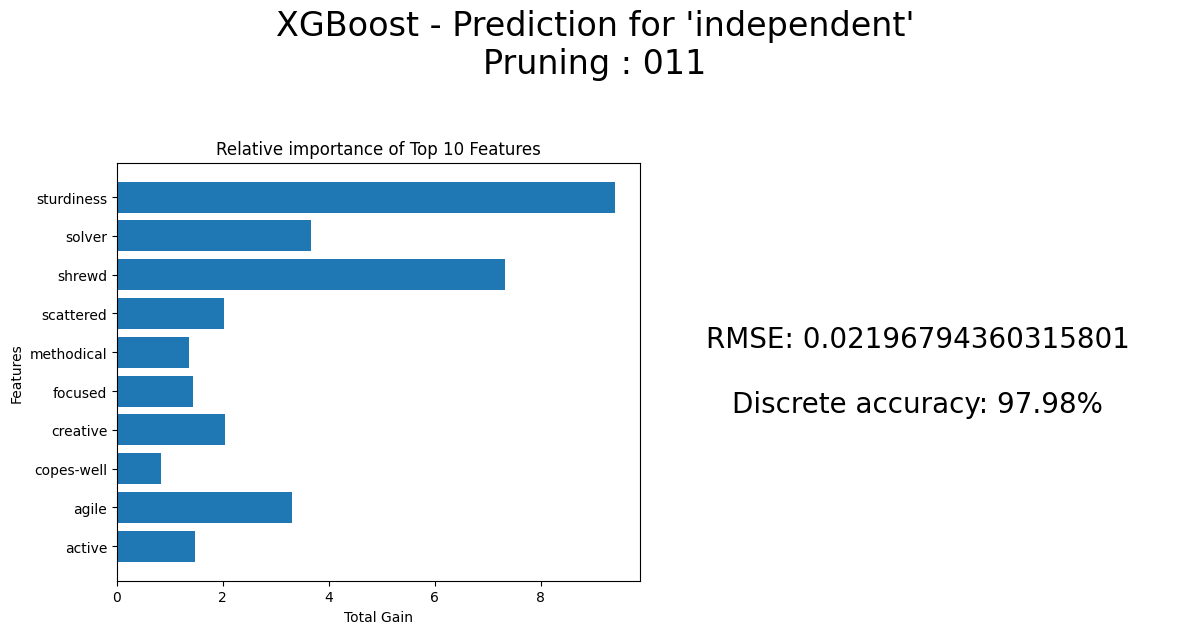

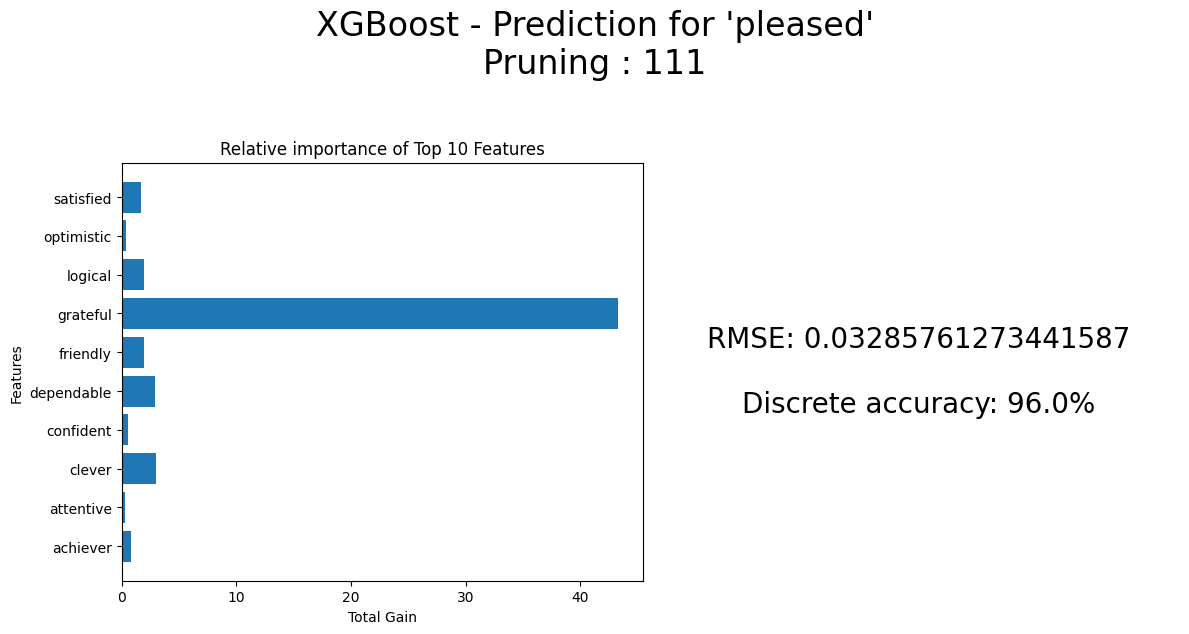

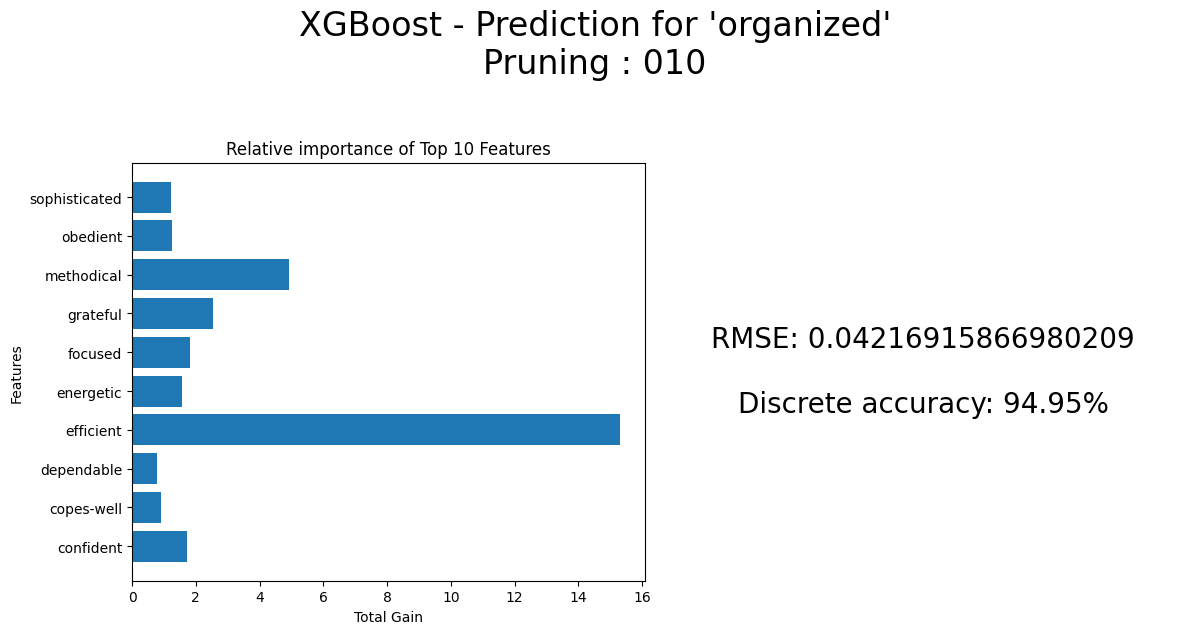

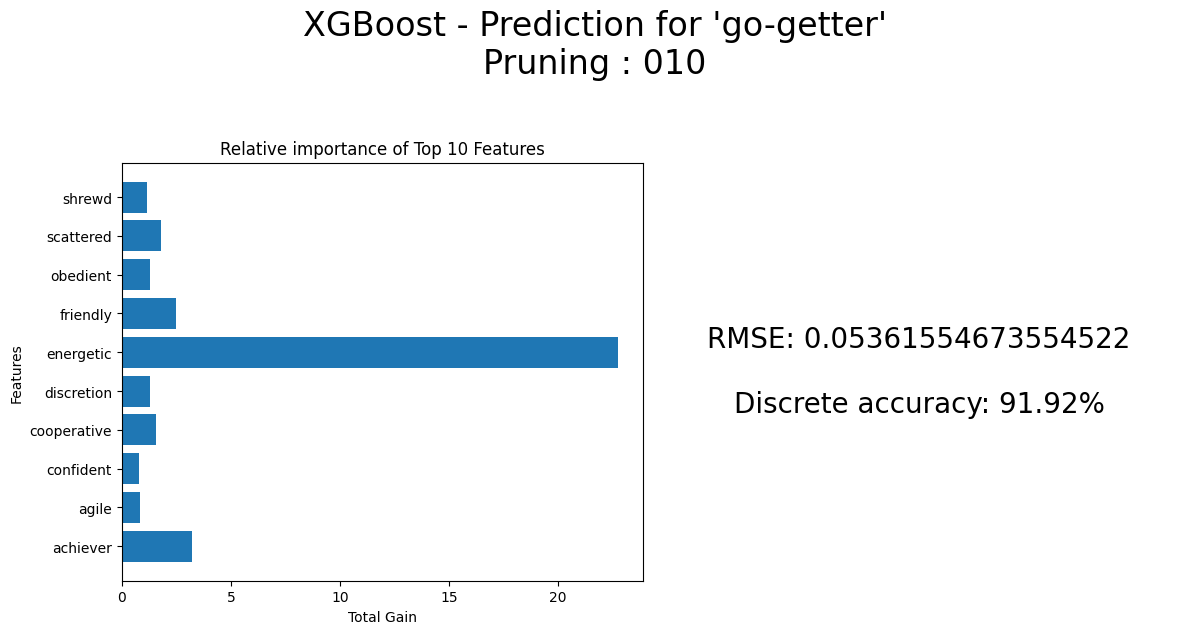

In [640]:

xgb_full_compact_comp = pd.DataFrame(columns=["Full RMSE", "Compact RMSE", "Full accuracy", "Compact Accuracy"], index=target_traits_df.columns)
for target, (opt_model, opt_eval, opt_feature_pruning, X_train, X_test, y_train, y_test) in xgb_models.items():
    most_important_features = opt_eval.get_top_n_features(5)
    compact_X_train = X_train[list(most_important_features.keys())]
    compact_X_test = X_test[list(most_important_features.keys())]
    compact_model = xgb.XGBRegressor(tree_method="exact", min_child_weight=10, max_depth=4)
    compact_model.fit(compact_X_train, y_train[target])
    pred = compact_model.predict(compact_X_test)
    compact_eval = XGBEvaluation(compact_model, y_test[target], pred, target)
    xgb_full_compact_comp.loc[target] = [opt_eval.rmse, compact_eval.rmse, opt_eval.discrete_accuracy, compact_eval.discrete_accuracy]
    opt_eval.show(opt_feature_pruning)
    

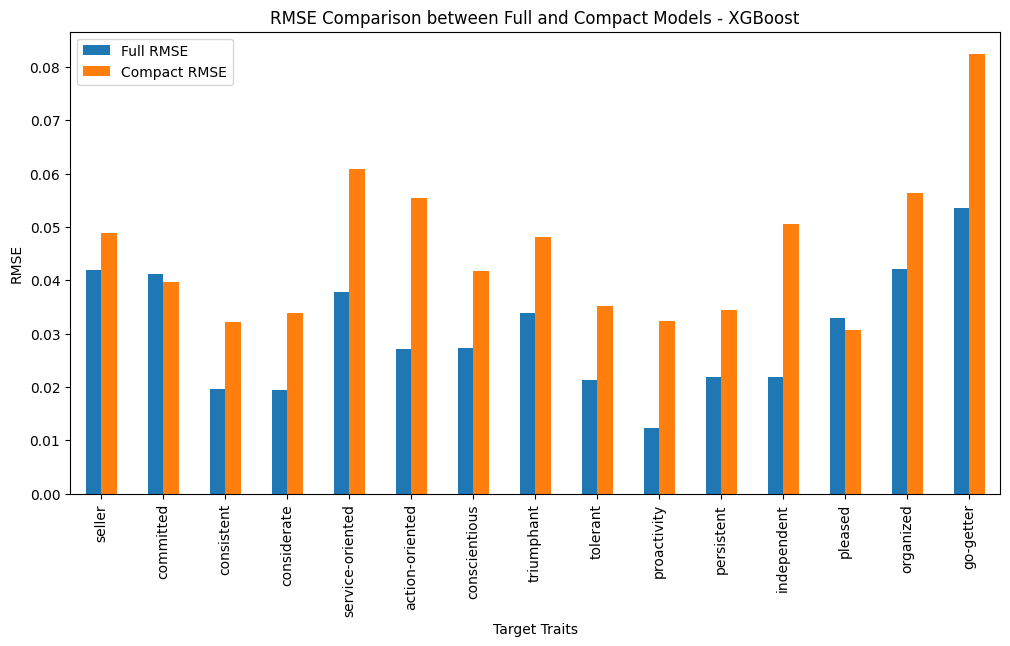

In [641]:
fig, ax = plt.subplots(figsize=(12, 6))
xgb_full_compact_comp[["Full RMSE", "Compact RMSE"]].plot.bar(ax=ax)
ax.set_title("RMSE Comparison between Full and Compact Models - XGBoost")
ax.set_ylabel("RMSE")
ax.set_xlabel("Target Traits")
plt.show()


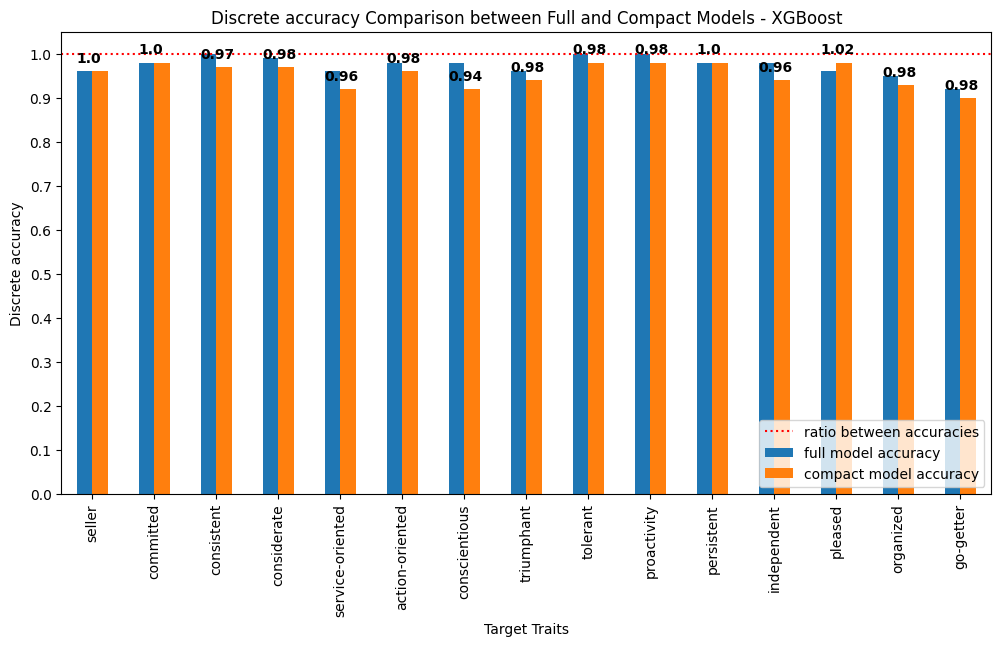

In [642]:
fig, ax = plt.subplots(figsize=(12, 6))
xgb_full_compact_comp[["Full accuracy", "Compact Accuracy"]].plot.bar(ax=ax)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.set_title("Discrete accuracy Comparison between Full and Compact Models - XGBoost")
ax.set_ylabel("Discrete accuracy", )
ax.set_xlabel("Target Traits")
y_value = 1
ax.axhline(y=y_value, color='red', linestyle='dotted')
ax.legend([ 'ratio between accuracies','full model accuracy', 'compact model accuracy'], loc='lower right')
# add a text annotation over each target trait bar displaying the ratio between accuracies
for i, v in enumerate(xgb_full_compact_comp["Compact Accuracy"]):
    ax.text(i - 0.25, v + 0.02, str(round(v/xgb_full_compact_comp["Full accuracy"][i], 2)), color='black', fontweight='bold')
plt.show()


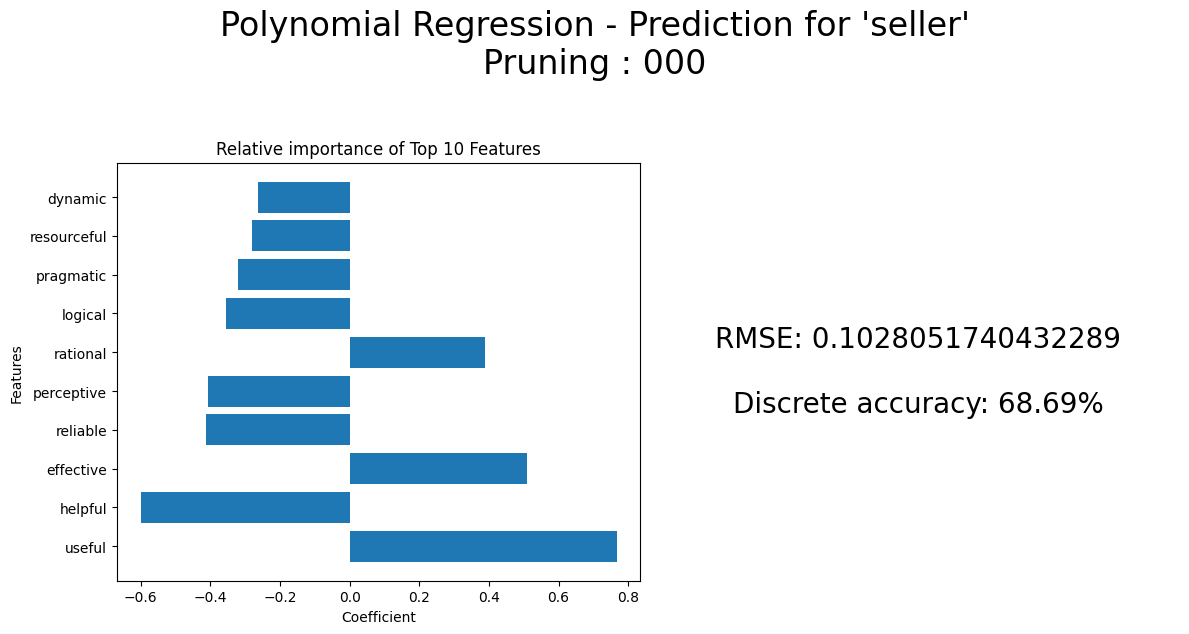

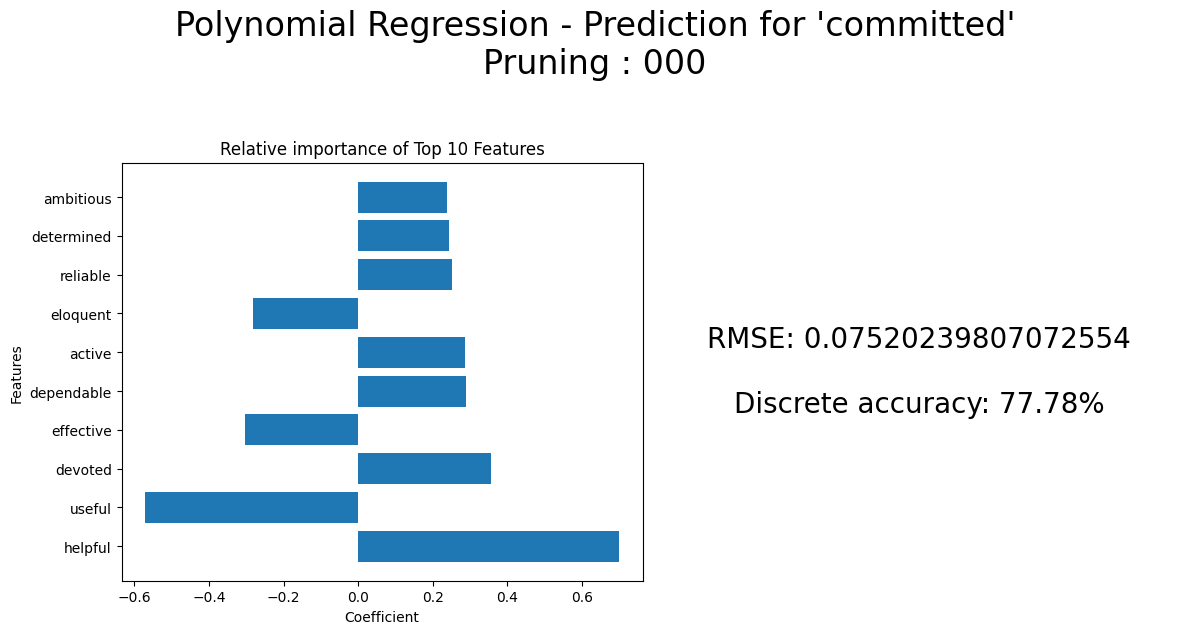

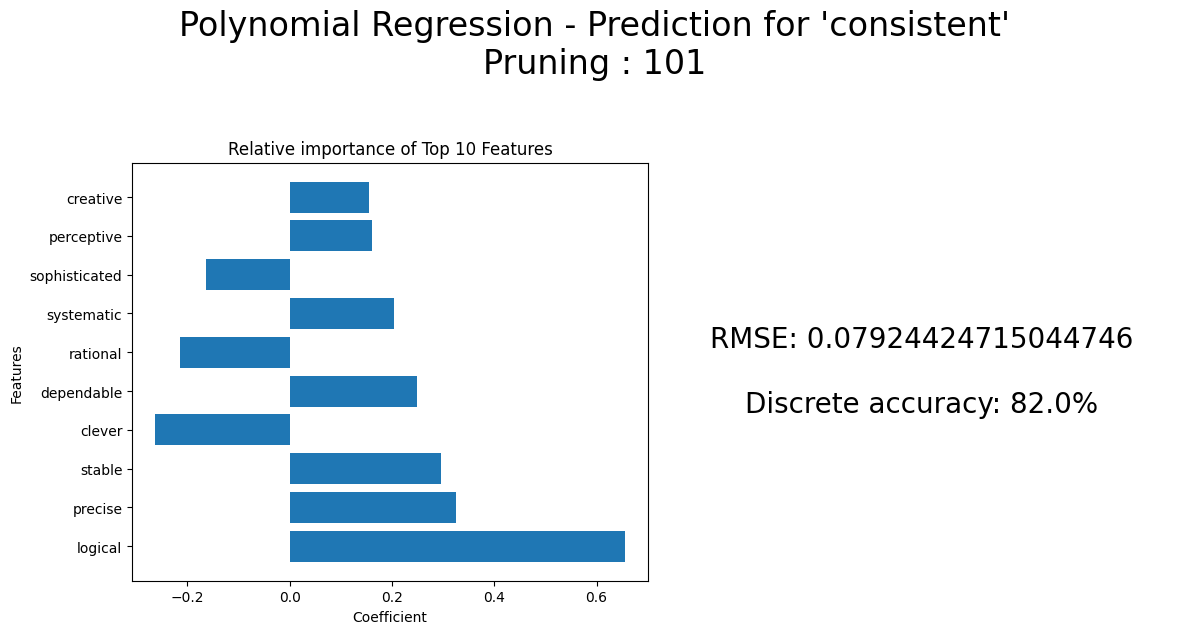

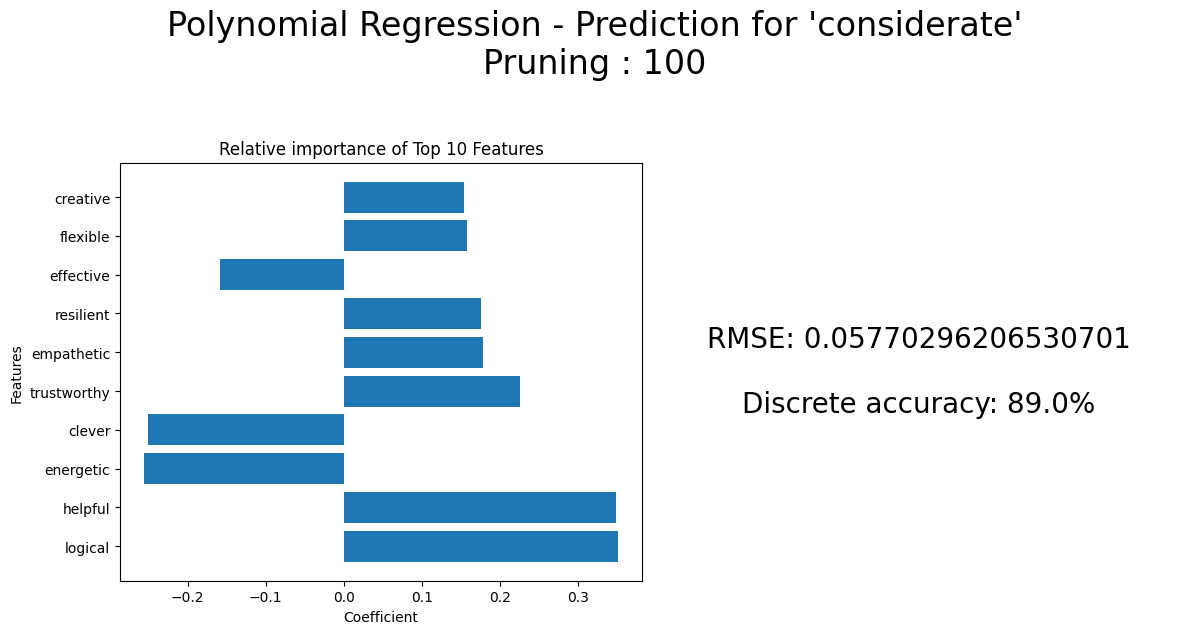

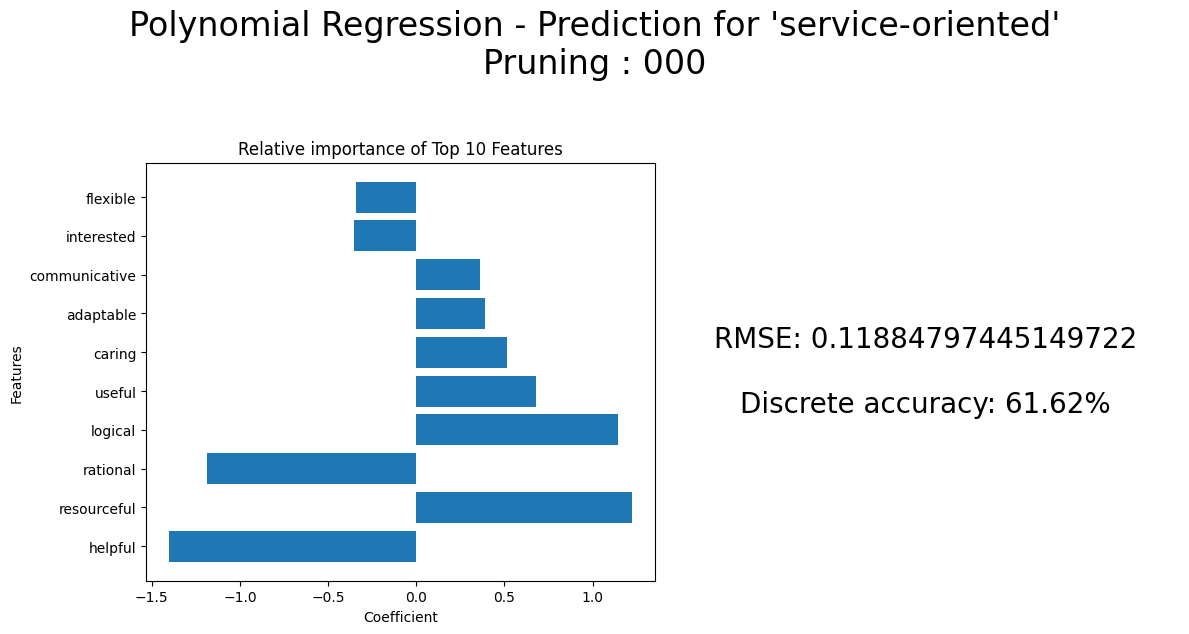

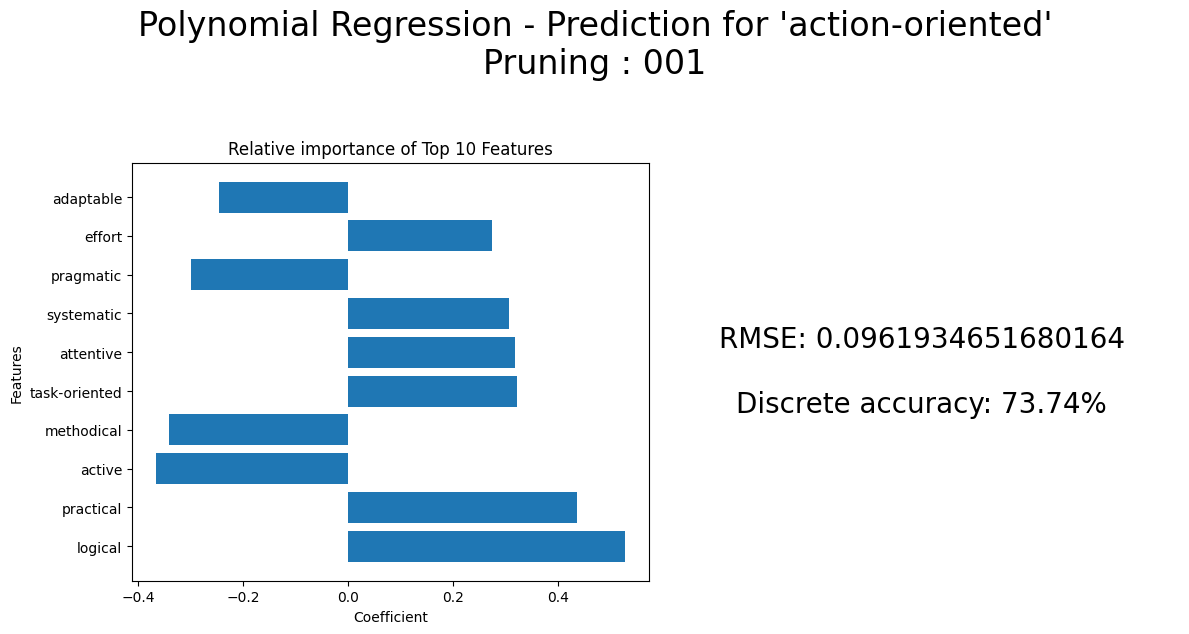

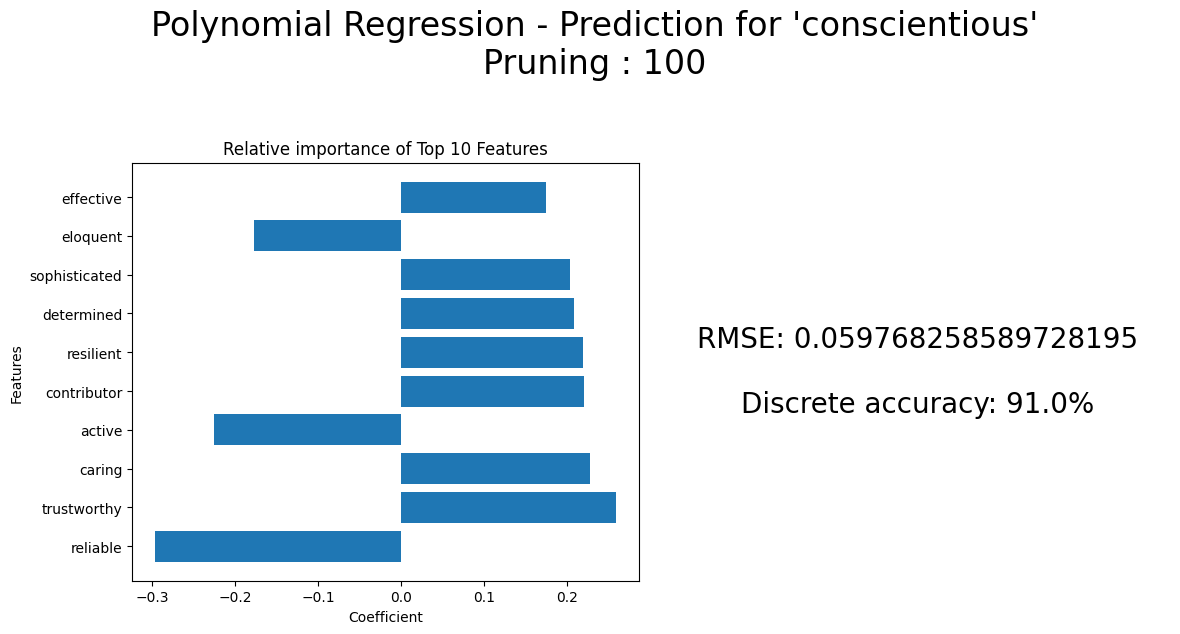

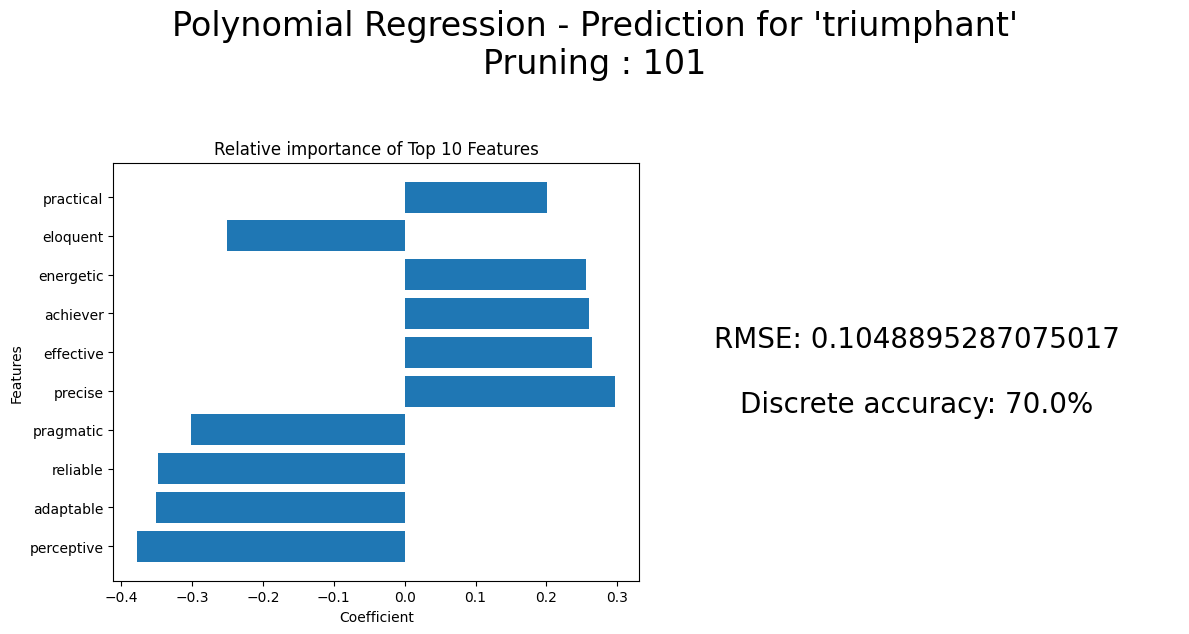

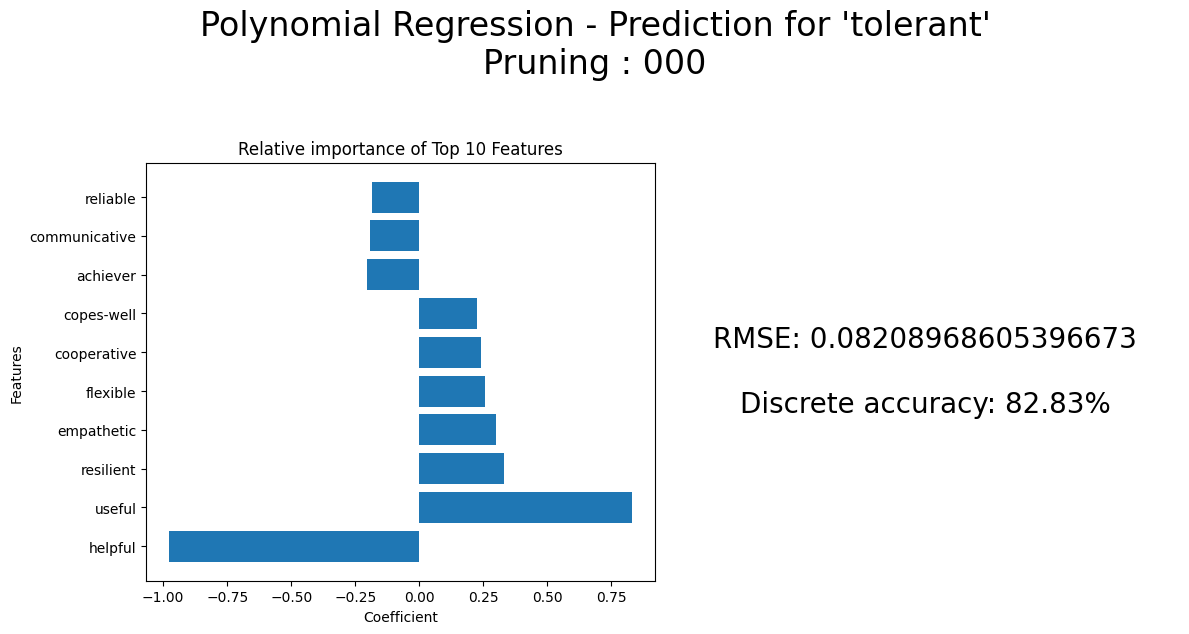

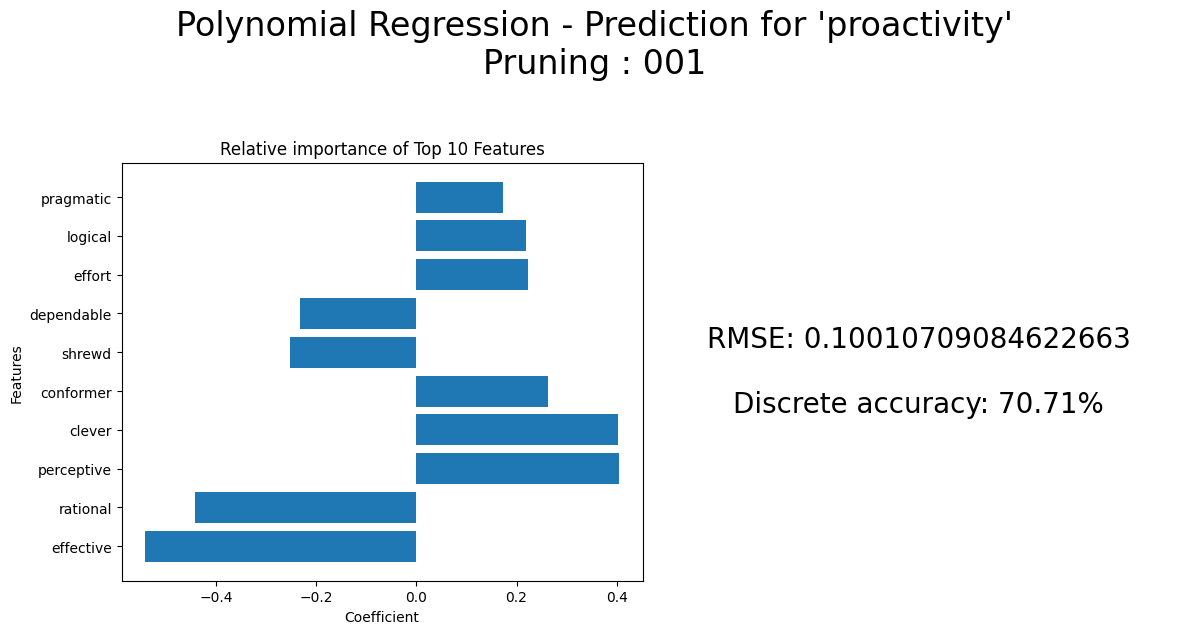

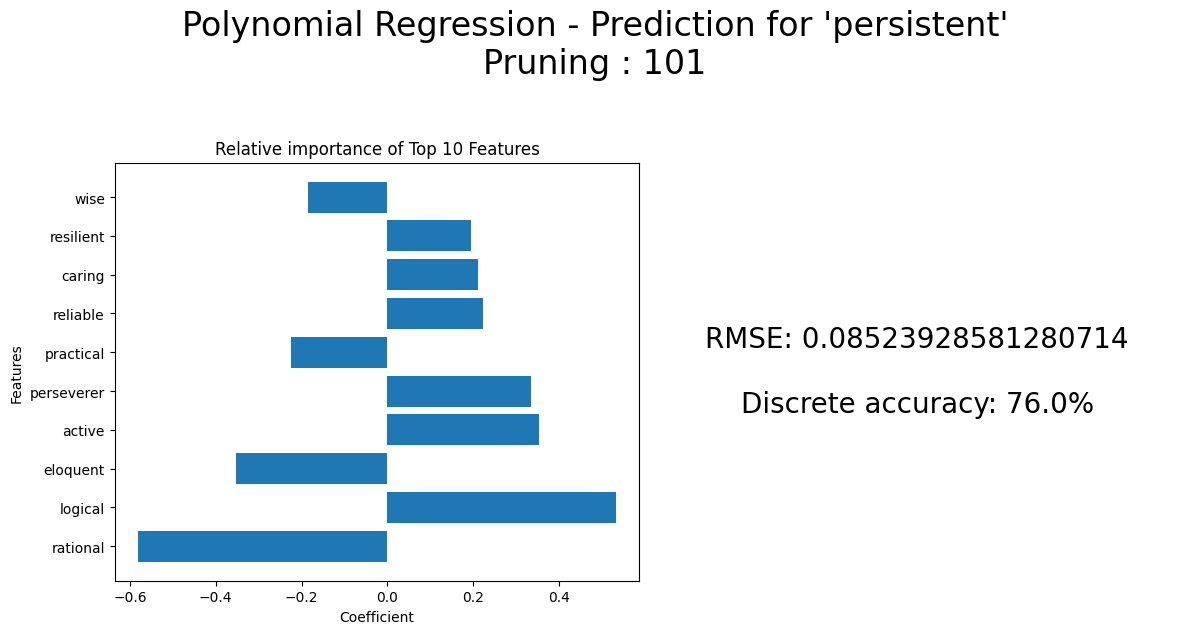

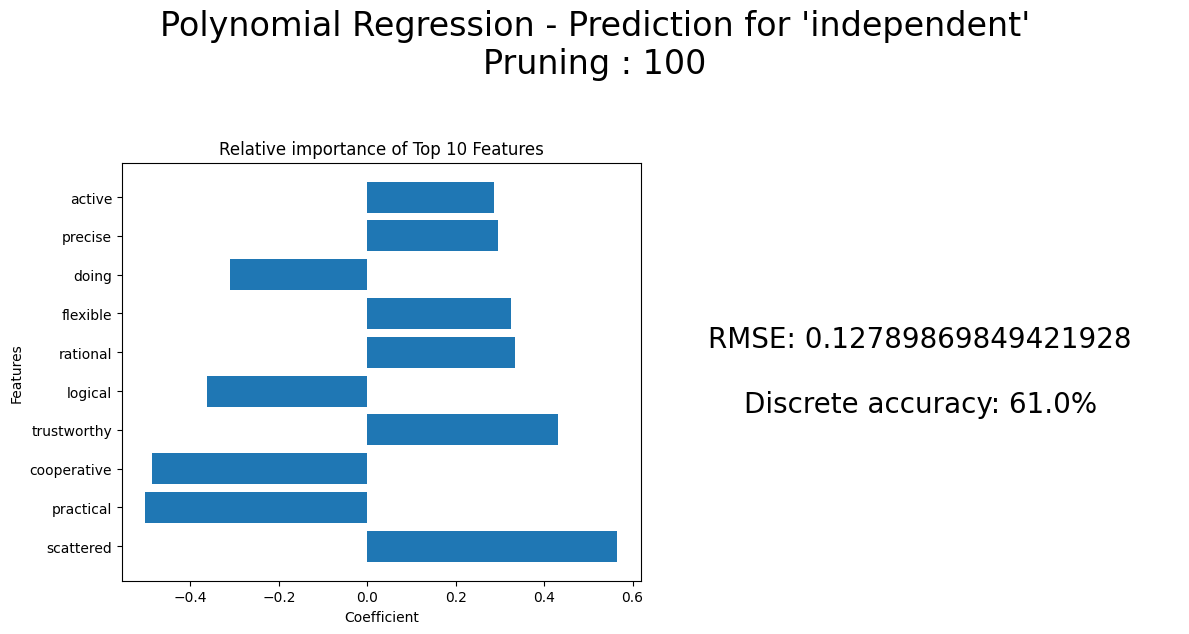

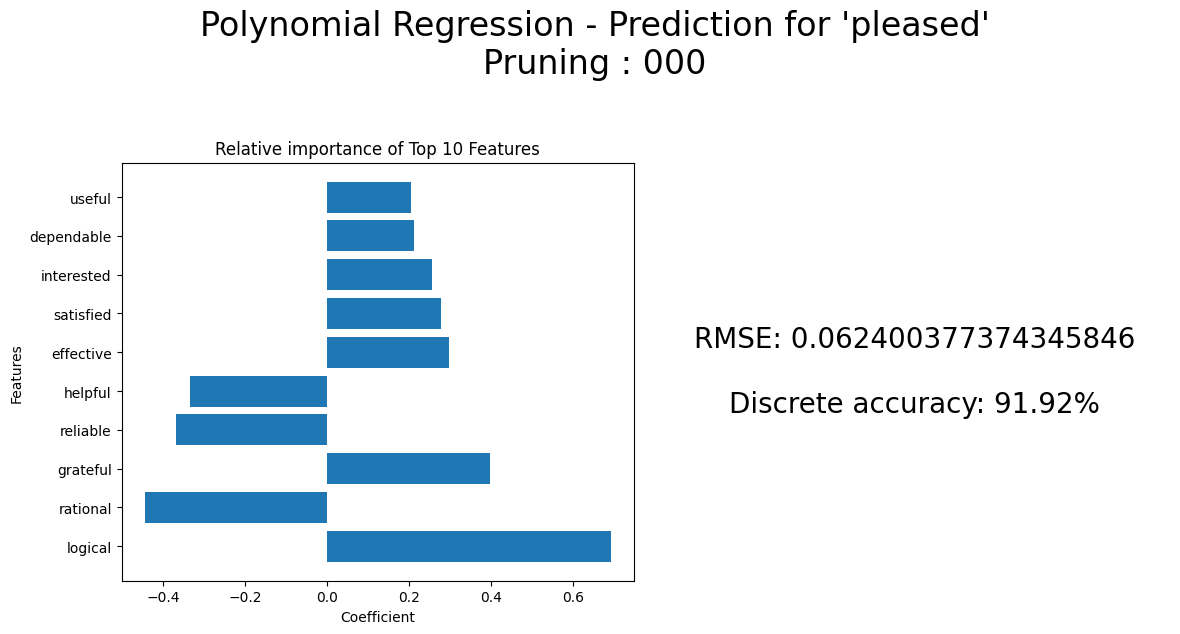

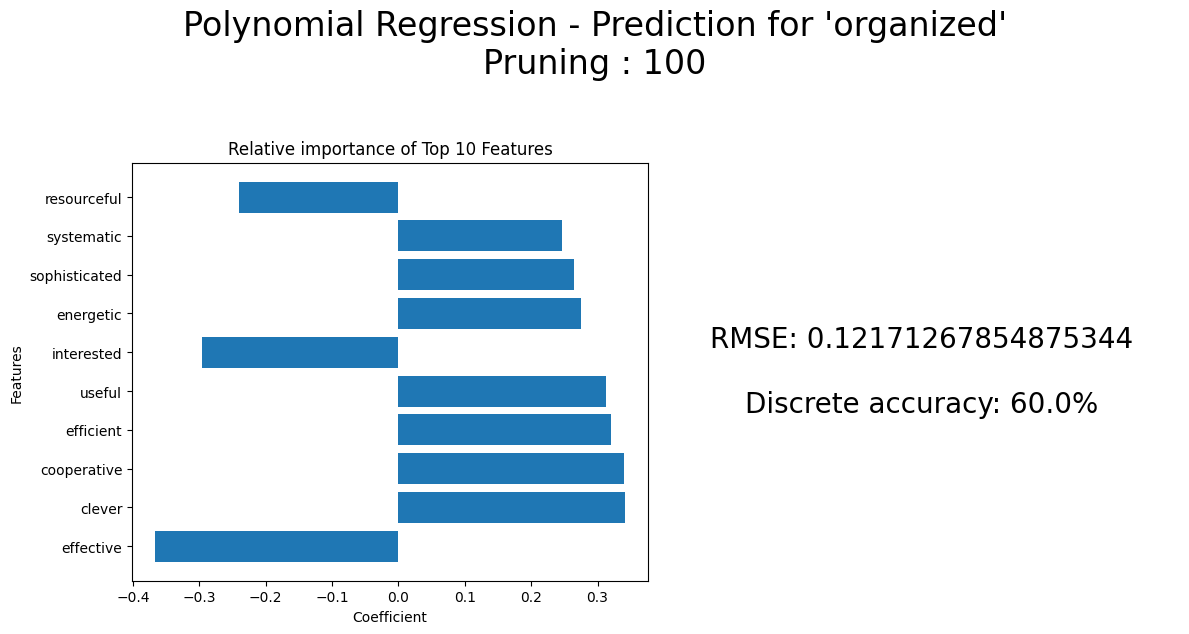

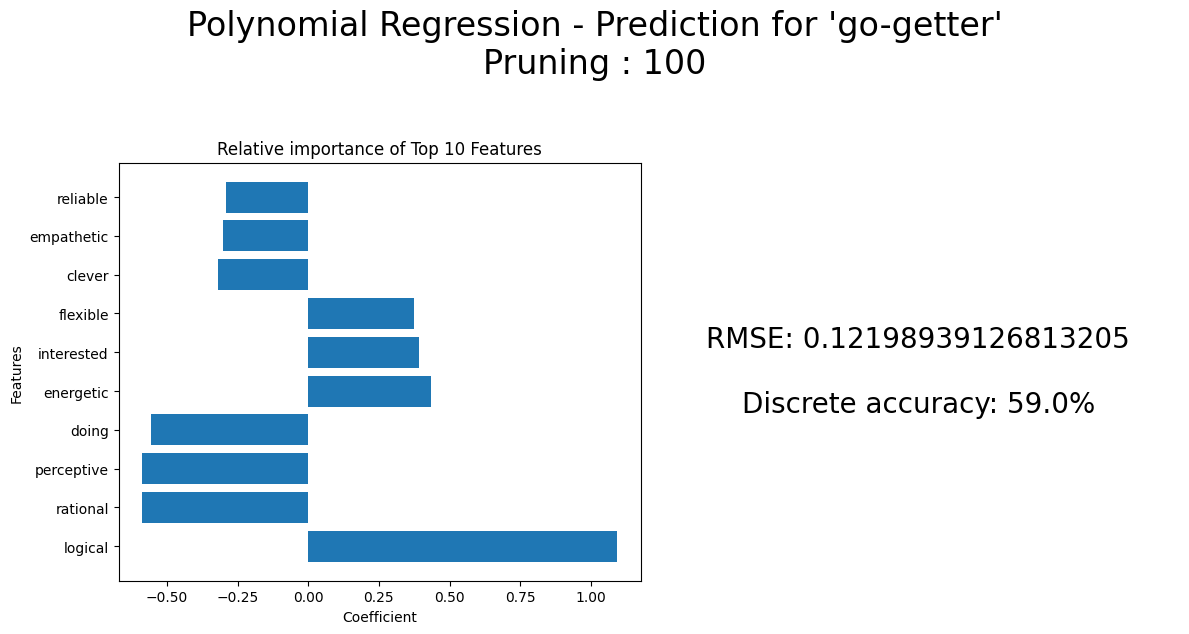

In [643]:
poly_full_compact_comp = pd.DataFrame(columns=["Full RMSE", "Compact RMSE", "Full accuracy", "Compact Accuracy"], index=target_traits_df.columns)
for target, (opt_model, opt_eval, opt_feature_pruning, X_train, X_test, y_train, y_test) in poly_models.items():
    most_important_features = opt_eval.get_top_n_features(5)
    compact_X_train = X_train[list(most_important_features.keys())]
    compact_X_test = X_test[list(most_important_features.keys())]
    compact_model = train_poly_model(compact_X_train, y_train[target])
    compact_poly_X_test, feature_names = linear_to_poly(compact_X_test, 1)
    pred = compact_model.predict(compact_poly_X_test)
    compact_eval = PolyEvaluation(compact_model, y_test[target], pred, target, feature_names=feature_names)
    poly_full_compact_comp.loc[target] = [opt_eval.rmse, compact_eval.rmse, opt_eval.discrete_accuracy, compact_eval.discrete_accuracy]
    opt_eval.show(opt_feature_pruning)

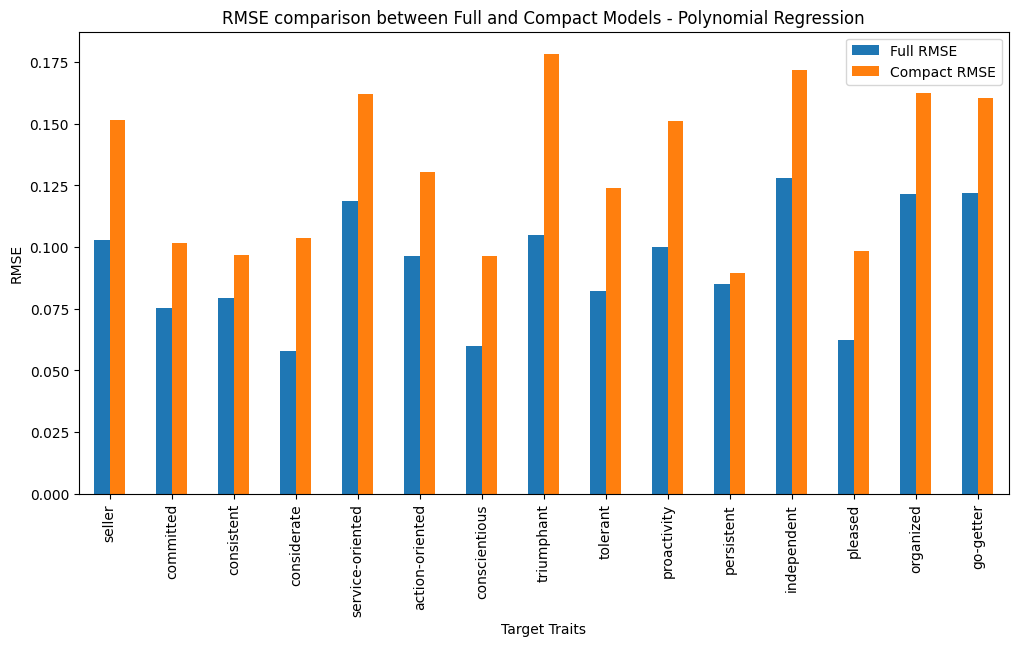

In [644]:
fig, ax = plt.subplots(figsize=(12, 6))
poly_full_compact_comp[["Full RMSE", "Compact RMSE"]].plot.bar(ax=ax)
ax.set_title("RMSE comparison between Full and Compact Models - Polynomial Regression")
ax.set_ylabel("RMSE")
ax.set_xlabel("Target Traits")
plt.show()

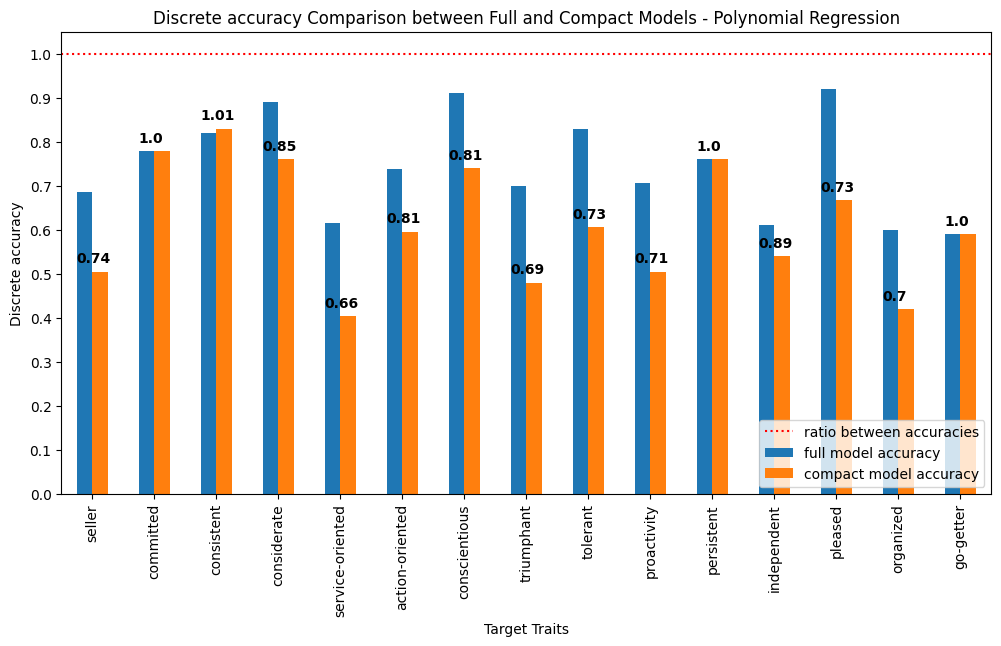

In [645]:
fig, ax = plt.subplots(figsize=(12, 6))
poly_full_compact_comp[["Full accuracy", "Compact Accuracy"]].plot.bar(ax=ax)
ax.yaxis.set_major_locator(ticker.MultipleLocator(0.1))
ax.set_title("Discrete accuracy Comparison between Full and Compact Models - Polynomial Regression")
ax.set_ylabel("Discrete accuracy", )
ax.set_xlabel("Target Traits")
y_value = 1
ax.axhline(y=y_value, color='red', linestyle='dotted')
ax.legend([ 'ratio between accuracies','full model accuracy', 'compact model accuracy'], loc='lower right')
# add a text annotation over each target trait bar displaying the ratio between accuracies
for i, v in enumerate(poly_full_compact_comp["Compact Accuracy"]):
    ax.text(i - 0.25, v + 0.02, str(round(v/poly_full_compact_comp["Full accuracy"][i], 2)), color='black', fontweight='bold')
plt.show()

# Correlated features clustering using cliques (not used)

In [646]:
# Try to group correlated features into clusters using cliques algorithm
# Basically we model the features as a graph in which correlated features are connected by an edge
# Then we find cliques in this graph, which are groups of features that are all connected to each other
# We don't use this technique in the end, but we can add it to the report

matrix = df.corr()
# keep only upper triangle elements (excluding diagonal elements)
mask_keep = np.triu(np.ones(matrix.shape), k=1).astype('bool').reshape(matrix.size)
# melt (unpivot) the dataframe and apply mask
sr = matrix.stack()[mask_keep]
# filter and get names
edges = sr[sr > 0.5].reset_index().values[:, :2]

import networkx as nx
g = nx.from_edgelist(edges)
ls_cliques = []
for clique in nx.algorithms.find_cliques_recursive(g):
    ls_cliques.append(clique)
ls_cliques

[['seller', 'improviser', 'agile', 'shrewd', 'solver', 'discretion'],
 ['seller', 'improviser', 'agile', 'shrewd', 'solver', 'independent'],
 ['service-oriented',
  'interested',
  'practical',
  'contributor',
  'active',
  'cooperative',
  'dependable',
  'doing',
  'trustworthy',
  'eloquent',
  'useful',
  'considerate',
  'helpful',
  'reliable',
  'conscientious',
  'caring',
  'resourceful',
  'empathetic',
  'effective',
  'proactivity',
  'devoted',
  'persistent'],
 ['service-oriented',
  'interested',
  'practical',
  'contributor',
  'active',
  'cooperative',
  'dependable',
  'doing',
  'trustworthy',
  'eloquent',
  'useful',
  'considerate',
  'helpful',
  'reliable',
  'conscientious',
  'caring',
  'resourceful',
  'empathetic',
  'effective',
  'proactivity',
  'communicative',
  'persistent'],
 ['service-oriented',
  'interested',
  'practical',
  'contributor',
  'active',
  'cooperative',
  'dependable',
  'doing',
  'trustworthy',
  'eloquent',
  'useful',
  'con